In [1]:
#@title Mount your Google Drive
# If you run this notebook locally or on a cluster (i.e. not on Google Colab)
# you can delete this cell which is specific to Google Colab. You may also
# change the paths for data/logs in Arguments below.
%matplotlib inline
%load_ext autoreload
%autoreload 2

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!ls /content/gdrive/Othercomputers/'My Computer'/IFT6135_W25_A2_release/plots

 4.3.1_gpt.png	  4.3.1.png   4.4.1.png		'lstm training.PNG'   modulo_lstm.png
 4.3.1_lstm.png   4.3.2.png   gpt_training.png	 modulo_gpt.png       old


In [3]:
!ls /content/gdrive/MyDrive/'Colab Notebooks'/IFT6135_W25_A2_release

checkpointing.py	  lstm.py		     README.md			      train.py
data.py			  LSTM_separate_metrics.png  requirements.txt		      Upload
gpt.py			  main.ipynb		     run_exp.py
GPT_separate_metrics.png  plotter.py		     separate_operations_results.png
logs			  __pycache__		     trainer.py


In [4]:
!ls /content/

gdrive	sample_data


In [5]:
%cd /content/gdrive/MyDrive/'Colab Notebooks'/IFT6135_W25_A2_release

/content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release


In [6]:
import os
print("Current working directory:", os.getcwd())


Current working directory: /content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release


In [7]:
#@title Link your assignment folder & install requirements
#@markdown Enter the path to the assignment folder in your Google Drive
# If you run this notebook locally or on a cluster (i.e. not on Google Colab)
# you can delete this cell which is specific to Google Colab. You may also
# change the paths for data/logs in Arguments below.
import sys
import os
import shutil
import warnings

folder = "/content/gdrive/MyDrive/'Colab Notebooks'/IFT6135_W25_A2_release" #@param {type:"string"}
!ln -Ts "$folder" /content/assignment 2> /dev/null

# Add the assignment folder to Python path
if '/content/assignment' not in sys.path:
  sys.path.insert(0, '/content/assignment')

# Check if CUDA is available
import torch
if not torch.cuda.is_available():
  warnings.warn('CUDA is not available.')

In [8]:
%matplotlib inline
import warnings

from dataclasses import dataclass
import torch
from torch import optim
from torchvision.datasets import CIFAR10
from torchvision import transforms
import json
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from torch.utils.data import DataLoader
import time
import os


# LSTM

Training binary operations model...
p : 31
operator : +
r_train : 0.5
train_batch_size : 512
eval_batch_size : 4096
num_workers : 0
model : lstm
num_heads : 4
num_layers : 2
embedding_size : 128
hidden_size : 128
dropout : 0.0
share_embeddings : False
bias_classifier : True
optimizer : adamw
lr : 0.001
weight_decay : 1.0
n_steps : 10001
eval_first : 100
eval_period : 100
print_step : 100
save_model_step : 1000
save_statistic_step : 1000
device : cuda
log_dir : ../logs
verbose : True
exp_name : binary_operations
operation_orders : 2
Model : LSTMLM(
  (embedding): Embedding(36, 128, padding_idx=35)
  (lstm): LSTM(
    (layers): ModuleList(
      (0-1): 2 x LSTMCell(
        (input_gate): Linear(in_features=256, out_features=128, bias=True)
        (forget_gate): Linear(in_features=256, out_features=128, bias=True)
        (output_gate): Linear(in_features=256, out_features=128, bias=True)
        (candidate_cell): Linear(in_features=256, out_features=128, bias=True)
      )
    )
  )
  (

Training:   0%|          | 2/10001 [00:00<56:54,  2.93it/s]  


Train loss : 3.545850 | Train accuracy : 0.012500 | Test loss : 3.543663 | Test accuracy : 0.016632 | lr = 0.001


Training:   1%|          | 102/10001 [00:20<19:13,  8.58it/s]


Train loss : 1.700498 | Train accuracy : 0.070833 | Test loss : 1.766537 | Test accuracy : 0.008316 | lr = 0.001


Training:   2%|▏         | 202/10001 [00:26<10:12, 15.99it/s]


Train loss : 0.931143 | Train accuracy : 0.652083 | Test loss : 2.596893 | Test accuracy : 0.000000 | lr = 0.001


Training:   3%|▎         | 302/10001 [00:32<10:07, 15.98it/s]


Train loss : 0.076418 | Train accuracy : 1.000000 | Test loss : 3.446685 | Test accuracy : 0.002079 | lr = 0.001


Training:   4%|▍         | 400/10001 [00:37<10:13, 15.65it/s]


Train loss : 0.028598 | Train accuracy : 1.000000 | Test loss : 3.530227 | Test accuracy : 0.004158 | lr = 0.001


Training:   5%|▌         | 502/10001 [00:44<14:06, 11.23it/s]


Train loss : 0.019781 | Train accuracy : 1.000000 | Test loss : 3.483594 | Test accuracy : 0.006237 | lr = 0.001


Training:   6%|▌         | 602/10001 [00:50<10:06, 15.50it/s]


Train loss : 0.015806 | Train accuracy : 1.000000 | Test loss : 3.406223 | Test accuracy : 0.006237 | lr = 0.001


Training:   7%|▋         | 702/10001 [00:55<12:37, 12.28it/s]


Train loss : 0.013214 | Train accuracy : 1.000000 | Test loss : 3.319659 | Test accuracy : 0.010395 | lr = 0.001


Training:   8%|▊         | 802/10001 [01:01<09:08, 16.78it/s]


Train loss : 0.012235 | Train accuracy : 1.000000 | Test loss : 3.262285 | Test accuracy : 0.012474 | lr = 0.001


Training:   9%|▉         | 902/10001 [01:07<09:08, 16.59it/s]


Train loss : 0.011374 | Train accuracy : 1.000000 | Test loss : 3.162269 | Test accuracy : 0.012474 | lr = 0.001


Training:  10%|█         | 1002/10001 [01:14<09:45, 15.36it/s]


Train loss : 0.010835 | Train accuracy : 1.000000 | Test loss : 3.082508 | Test accuracy : 0.018711 | lr = 0.001


Training:  11%|█         | 1102/10001 [01:19<09:10, 16.17it/s]


Train loss : 0.009788 | Train accuracy : 1.000000 | Test loss : 3.012326 | Test accuracy : 0.024948 | lr = 0.001


Training:  12%|█▏        | 1202/10001 [01:26<08:46, 16.72it/s]


Train loss : 0.008816 | Train accuracy : 1.000000 | Test loss : 2.942335 | Test accuracy : 0.027027 | lr = 0.001


Training:  13%|█▎        | 1302/10001 [01:31<08:30, 17.03it/s]


Train loss : 0.007980 | Train accuracy : 1.000000 | Test loss : 2.871224 | Test accuracy : 0.033264 | lr = 0.001


Training:  14%|█▍        | 1402/10001 [01:38<08:30, 16.84it/s]


Train loss : 0.007259 | Train accuracy : 1.000000 | Test loss : 2.799117 | Test accuracy : 0.039501 | lr = 0.001


Training:  15%|█▌        | 1502/10001 [01:43<08:32, 16.59it/s]


Train loss : 0.006632 | Train accuracy : 1.000000 | Test loss : 2.725866 | Test accuracy : 0.045738 | lr = 0.001


Training:  16%|█▌        | 1602/10001 [01:50<09:06, 15.36it/s]


Train loss : 0.006080 | Train accuracy : 1.000000 | Test loss : 2.650656 | Test accuracy : 0.049896 | lr = 0.001


Training:  17%|█▋        | 1702/10001 [01:55<08:02, 17.19it/s]


Train loss : 0.005591 | Train accuracy : 1.000000 | Test loss : 2.573135 | Test accuracy : 0.047817 | lr = 0.001


Training:  18%|█▊        | 1802/10001 [02:01<13:52,  9.84it/s]


Train loss : 0.005155 | Train accuracy : 1.000000 | Test loss : 2.493232 | Test accuracy : 0.060291 | lr = 0.001


Training:  19%|█▉        | 1902/10001 [02:07<08:05, 16.67it/s]


Train loss : 0.004765 | Train accuracy : 1.000000 | Test loss : 2.411680 | Test accuracy : 0.062370 | lr = 0.001


Training:  20%|█▉        | 2000/10001 [02:12<12:08, 10.98it/s]


Train loss : 0.004414 | Train accuracy : 1.000000 | Test loss : 2.329278 | Test accuracy : 0.076923 | lr = 0.001


Training:  21%|██        | 2102/10001 [02:19<07:58, 16.49it/s]


Train loss : 0.004095 | Train accuracy : 1.000000 | Test loss : 2.246395 | Test accuracy : 0.079002 | lr = 0.001


Training:  22%|██▏       | 2202/10001 [02:24<07:48, 16.63it/s]


Train loss : 0.003807 | Train accuracy : 1.000000 | Test loss : 2.163094 | Test accuracy : 0.093555 | lr = 0.001


Training:  23%|██▎       | 2302/10001 [02:31<08:17, 15.47it/s]


Train loss : 0.003546 | Train accuracy : 1.000000 | Test loss : 2.080505 | Test accuracy : 0.118503 | lr = 0.001


Training:  24%|██▍       | 2402/10001 [02:36<07:27, 16.99it/s]


Train loss : 0.003308 | Train accuracy : 1.000000 | Test loss : 1.999461 | Test accuracy : 0.139293 | lr = 0.001


Training:  25%|██▌       | 2502/10001 [02:43<07:50, 15.94it/s]


Train loss : 0.003091 | Train accuracy : 1.000000 | Test loss : 1.920639 | Test accuracy : 0.155925 | lr = 0.001


Training:  26%|██▌       | 2602/10001 [02:48<07:28, 16.50it/s]


Train loss : 0.002894 | Train accuracy : 1.000000 | Test loss : 1.844925 | Test accuracy : 0.168399 | lr = 0.001


Training:  27%|██▋       | 2702/10001 [02:55<07:29, 16.23it/s]


Train loss : 0.001819 | Train accuracy : 1.000000 | Test loss : 1.783685 | Test accuracy : 0.203742 | lr = 0.001


Training:  28%|██▊       | 2802/10001 [03:00<07:25, 16.16it/s]


Train loss : 0.003365 | Train accuracy : 1.000000 | Test loss : 1.677170 | Test accuracy : 0.218295 | lr = 0.001


Training:  29%|██▉       | 2902/10001 [03:06<11:00, 10.75it/s]


Train loss : 0.003680 | Train accuracy : 1.000000 | Test loss : 1.610034 | Test accuracy : 0.230769 | lr = 0.001


Training:  30%|███       | 3002/10001 [03:12<07:32, 15.48it/s]


Train loss : 0.003549 | Train accuracy : 1.000000 | Test loss : 1.549403 | Test accuracy : 0.249480 | lr = 0.001


Training:  31%|███       | 3102/10001 [03:18<09:45, 11.78it/s]


Train loss : 0.003351 | Train accuracy : 1.000000 | Test loss : 1.488590 | Test accuracy : 0.268191 | lr = 0.001


Training:  32%|███▏      | 3202/10001 [03:24<07:11, 15.76it/s]


Train loss : 0.003152 | Train accuracy : 1.000000 | Test loss : 1.427096 | Test accuracy : 0.278586 | lr = 0.001


Training:  33%|███▎      | 3302/10001 [03:29<06:40, 16.71it/s]


Train loss : 0.002965 | Train accuracy : 1.000000 | Test loss : 1.365274 | Test accuracy : 0.286902 | lr = 0.001


Training:  34%|███▍      | 3402/10001 [03:36<06:48, 16.17it/s]


Train loss : 0.002791 | Train accuracy : 1.000000 | Test loss : 1.303635 | Test accuracy : 0.311850 | lr = 0.001


Training:  35%|███▌      | 3502/10001 [03:41<06:32, 16.57it/s]


Train loss : 0.002629 | Train accuracy : 1.000000 | Test loss : 1.242685 | Test accuracy : 0.353430 | lr = 0.001


Training:  36%|███▌      | 3602/10001 [03:48<06:29, 16.41it/s]


Train loss : 0.002478 | Train accuracy : 1.000000 | Test loss : 1.182780 | Test accuracy : 0.376299 | lr = 0.001


Training:  37%|███▋      | 3702/10001 [03:53<06:09, 17.04it/s]


Train loss : 0.002338 | Train accuracy : 1.000000 | Test loss : 1.124051 | Test accuracy : 0.397089 | lr = 0.001


Training:  38%|███▊      | 3802/10001 [04:00<06:13, 16.59it/s]


Train loss : 0.002206 | Train accuracy : 1.000000 | Test loss : 1.066499 | Test accuracy : 0.426195 | lr = 0.001


Training:  39%|███▉      | 3902/10001 [04:05<06:09, 16.52it/s]


Train loss : 0.002082 | Train accuracy : 1.000000 | Test loss : 1.010088 | Test accuracy : 0.444906 | lr = 0.001


Training:  40%|████      | 4002/10001 [04:12<09:31, 10.50it/s]


Train loss : 0.001966 | Train accuracy : 1.000000 | Test loss : 0.954829 | Test accuracy : 0.471933 | lr = 0.001


Training:  41%|████      | 4102/10001 [04:17<05:47, 16.98it/s]


Train loss : 0.001857 | Train accuracy : 1.000000 | Test loss : 0.900796 | Test accuracy : 0.505198 | lr = 0.001


Training:  42%|████▏     | 4202/10001 [04:23<08:03, 12.00it/s]


Train loss : 0.001755 | Train accuracy : 1.000000 | Test loss : 0.848104 | Test accuracy : 0.528067 | lr = 0.001


Training:  43%|████▎     | 4302/10001 [04:29<05:44, 16.54it/s]


Train loss : 0.001658 | Train accuracy : 1.000000 | Test loss : 0.796939 | Test accuracy : 0.540541 | lr = 0.001


Training:  44%|████▍     | 4402/10001 [04:34<05:36, 16.63it/s]


Train loss : 0.001568 | Train accuracy : 1.000000 | Test loss : 0.747443 | Test accuracy : 0.571726 | lr = 0.001


Training:  45%|████▌     | 4502/10001 [04:41<05:21, 17.10it/s]


Train loss : 0.001482 | Train accuracy : 1.000000 | Test loss : 0.699657 | Test accuracy : 0.596674 | lr = 0.001


Training:  46%|████▌     | 4602/10001 [04:46<05:25, 16.60it/s]


Train loss : 0.001403 | Train accuracy : 1.000000 | Test loss : 0.653516 | Test accuracy : 0.621622 | lr = 0.001


Training:  47%|████▋     | 4702/10001 [04:53<05:14, 16.86it/s]


Train loss : 0.001328 | Train accuracy : 1.000000 | Test loss : 0.608900 | Test accuracy : 0.642412 | lr = 0.001


Training:  48%|████▊     | 4802/10001 [04:58<05:18, 16.35it/s]


Train loss : 0.001257 | Train accuracy : 1.000000 | Test loss : 0.565780 | Test accuracy : 0.650728 | lr = 0.001


Training:  49%|████▉     | 4902/10001 [05:05<04:56, 17.19it/s]


Train loss : 0.001191 | Train accuracy : 1.000000 | Test loss : 0.524487 | Test accuracy : 0.681913 | lr = 0.001


Training:  50%|█████     | 5002/10001 [05:10<05:45, 14.49it/s]


Train loss : 0.001128 | Train accuracy : 1.000000 | Test loss : 0.485475 | Test accuracy : 0.704782 | lr = 0.001


Training:  51%|█████     | 5102/10001 [05:17<05:21, 15.26it/s]


Train loss : 0.001069 | Train accuracy : 1.000000 | Test loss : 0.448891 | Test accuracy : 0.735967 | lr = 0.001


Training:  52%|█████▏    | 5202/10001 [05:22<04:47, 16.69it/s]


Train loss : 0.001014 | Train accuracy : 1.000000 | Test loss : 0.414690 | Test accuracy : 0.752599 | lr = 0.001


Training:  53%|█████▎    | 5302/10001 [05:28<06:29, 12.05it/s]


Train loss : 0.000961 | Train accuracy : 1.000000 | Test loss : 0.382758 | Test accuracy : 0.765073 | lr = 0.001


Training:  54%|█████▍    | 5402/10001 [05:34<04:37, 16.58it/s]


Train loss : 0.000912 | Train accuracy : 1.000000 | Test loss : 0.352854 | Test accuracy : 0.783784 | lr = 0.001


Training:  55%|█████▌    | 5502/10001 [05:40<05:58, 12.55it/s]


Train loss : 0.000865 | Train accuracy : 1.000000 | Test loss : 0.324475 | Test accuracy : 0.804574 | lr = 0.001


Training:  56%|█████▌    | 5602/10001 [05:46<04:25, 16.58it/s]


Train loss : 0.000821 | Train accuracy : 1.000000 | Test loss : 0.296898 | Test accuracy : 0.814969 | lr = 0.001


Training:  57%|█████▋    | 5702/10001 [05:52<04:17, 16.72it/s]


Train loss : 0.000780 | Train accuracy : 1.000000 | Test loss : 0.270292 | Test accuracy : 0.831601 | lr = 0.001


Training:  58%|█████▊    | 5802/10001 [05:58<04:11, 16.71it/s]


Train loss : 0.000740 | Train accuracy : 1.000000 | Test loss : 0.245897 | Test accuracy : 0.848233 | lr = 0.001


Training:  59%|█████▉    | 5902/10001 [06:04<05:01, 13.61it/s]


Train loss : 0.000703 | Train accuracy : 1.000000 | Test loss : 0.223933 | Test accuracy : 0.852391 | lr = 0.001


Training:  60%|██████    | 6002/10001 [06:10<04:20, 15.33it/s]


Train loss : 0.000669 | Train accuracy : 1.000000 | Test loss : 0.204015 | Test accuracy : 0.871102 | lr = 0.001


Training:  61%|██████    | 6102/10001 [06:16<03:50, 16.91it/s]


Train loss : 0.000636 | Train accuracy : 1.000000 | Test loss : 0.185788 | Test accuracy : 0.883576 | lr = 0.001


Training:  62%|██████▏   | 6202/10001 [06:22<03:52, 16.33it/s]


Train loss : 0.000604 | Train accuracy : 1.000000 | Test loss : 0.168925 | Test accuracy : 0.893971 | lr = 0.001


Training:  63%|██████▎   | 6302/10001 [06:27<03:43, 16.57it/s]


Train loss : 0.000574 | Train accuracy : 1.000000 | Test loss : 0.153043 | Test accuracy : 0.900208 | lr = 0.001


Training:  64%|██████▍   | 6402/10001 [06:34<05:31, 10.86it/s]


Train loss : 0.000546 | Train accuracy : 1.000000 | Test loss : 0.138115 | Test accuracy : 0.912682 | lr = 0.001


Training:  65%|██████▌   | 6502/10001 [06:39<03:27, 16.86it/s]


Train loss : 0.000520 | Train accuracy : 1.000000 | Test loss : 0.124553 | Test accuracy : 0.923077 | lr = 0.001


Training:  66%|██████▌   | 6602/10001 [06:45<04:41, 12.07it/s]


Train loss : 0.000494 | Train accuracy : 1.000000 | Test loss : 0.112321 | Test accuracy : 0.931393 | lr = 0.001


Training:  67%|██████▋   | 6702/10001 [06:51<03:19, 16.54it/s]


Train loss : 0.000470 | Train accuracy : 1.000000 | Test loss : 0.101224 | Test accuracy : 0.939709 | lr = 0.001


Training:  68%|██████▊   | 6802/10001 [06:57<03:16, 16.30it/s]


Train loss : 0.000447 | Train accuracy : 1.000000 | Test loss : 0.091062 | Test accuracy : 0.950104 | lr = 0.001


Training:  69%|██████▉   | 6900/10001 [07:03<03:11, 16.15it/s]


Train loss : 0.000426 | Train accuracy : 1.000000 | Test loss : 0.081638 | Test accuracy : 0.958420 | lr = 0.001


Training:  70%|███████   | 7002/10001 [07:09<03:15, 15.35it/s]


Train loss : 0.000405 | Train accuracy : 1.000000 | Test loss : 0.072861 | Test accuracy : 0.962578 | lr = 0.001


Training:  71%|███████   | 7102/10001 [07:15<02:54, 16.66it/s]


Train loss : 0.000385 | Train accuracy : 1.000000 | Test loss : 0.064761 | Test accuracy : 0.966736 | lr = 0.001


Training:  72%|███████▏  | 7202/10001 [07:21<02:50, 16.44it/s]


Train loss : 0.000367 | Train accuracy : 1.000000 | Test loss : 0.057344 | Test accuracy : 0.975052 | lr = 0.001


Training:  73%|███████▎  | 7302/10001 [07:27<02:45, 16.32it/s]


Train loss : 0.000349 | Train accuracy : 1.000000 | Test loss : 0.050594 | Test accuracy : 0.983368 | lr = 0.001


Training:  74%|███████▍  | 7402/10001 [07:33<02:33, 16.89it/s]


Train loss : 0.000332 | Train accuracy : 1.000000 | Test loss : 0.044469 | Test accuracy : 0.987526 | lr = 0.001


Training:  75%|███████▌  | 7502/10001 [07:39<02:45, 15.11it/s]


Train loss : 0.000316 | Train accuracy : 1.000000 | Test loss : 0.038900 | Test accuracy : 0.993763 | lr = 0.001


Training:  76%|███████▌  | 7602/10001 [07:45<02:20, 17.02it/s]


Train loss : 0.000300 | Train accuracy : 1.000000 | Test loss : 0.033844 | Test accuracy : 0.995842 | lr = 0.001


Training:  77%|███████▋  | 7702/10001 [07:51<03:14, 11.84it/s]


Train loss : 0.000286 | Train accuracy : 1.000000 | Test loss : 0.029310 | Test accuracy : 0.997921 | lr = 0.001


Training:  78%|███████▊  | 7802/10001 [07:57<02:11, 16.69it/s]


Train loss : 0.000272 | Train accuracy : 1.000000 | Test loss : 0.025356 | Test accuracy : 0.997921 | lr = 0.001


Training:  79%|███████▉  | 7902/10001 [08:02<03:00, 11.65it/s]


Train loss : 0.000259 | Train accuracy : 1.000000 | Test loss : 0.021942 | Test accuracy : 0.997921 | lr = 0.001


Training:  80%|████████  | 8002/10001 [08:09<02:09, 15.44it/s]


Train loss : 0.000247 | Train accuracy : 1.000000 | Test loss : 0.018982 | Test accuracy : 0.997921 | lr = 0.001


Training:  81%|████████  | 8102/10001 [08:14<02:22, 13.33it/s]


Train loss : 0.000235 | Train accuracy : 1.000000 | Test loss : 0.016417 | Test accuracy : 0.997921 | lr = 0.001


Training:  82%|████████▏ | 8202/10001 [08:21<01:46, 16.86it/s]


Train loss : 0.000224 | Train accuracy : 1.000000 | Test loss : 0.014197 | Test accuracy : 1.000000 | lr = 0.001


Training:  83%|████████▎ | 8302/10001 [08:26<01:41, 16.72it/s]


Train loss : 0.000213 | Train accuracy : 1.000000 | Test loss : 0.012274 | Test accuracy : 1.000000 | lr = 0.001


Training:  84%|████████▍ | 8402/10001 [08:32<01:39, 16.14it/s]


Train loss : 0.000203 | Train accuracy : 1.000000 | Test loss : 0.010607 | Test accuracy : 1.000000 | lr = 0.001


Training:  85%|████████▌ | 8502/10001 [08:38<01:28, 16.99it/s]


Train loss : 0.000193 | Train accuracy : 1.000000 | Test loss : 0.009161 | Test accuracy : 1.000000 | lr = 0.001


Training:  86%|████████▌ | 8602/10001 [08:44<01:29, 15.70it/s]


Train loss : 0.000184 | Train accuracy : 1.000000 | Test loss : 0.007904 | Test accuracy : 1.000000 | lr = 0.001


Training:  87%|████████▋ | 8702/10001 [08:50<01:19, 16.35it/s]


Train loss : 0.000175 | Train accuracy : 1.000000 | Test loss : 0.006815 | Test accuracy : 1.000000 | lr = 0.001


Training:  88%|████████▊ | 8802/10001 [08:56<01:49, 10.91it/s]


Train loss : 0.000167 | Train accuracy : 1.000000 | Test loss : 0.005880 | Test accuracy : 1.000000 | lr = 0.001


Training:  89%|████████▉ | 8902/10001 [09:02<01:06, 16.63it/s]


Train loss : 0.000159 | Train accuracy : 1.000000 | Test loss : 0.005087 | Test accuracy : 1.000000 | lr = 0.001


Training:  90%|████████▉ | 9000/10001 [09:07<01:33, 10.67it/s]


Train loss : 0.000151 | Train accuracy : 1.000000 | Test loss : 0.004408 | Test accuracy : 1.000000 | lr = 0.001


Training:  91%|█████████ | 9102/10001 [09:14<00:54, 16.54it/s]


Train loss : 0.000144 | Train accuracy : 1.000000 | Test loss : 0.003825 | Test accuracy : 1.000000 | lr = 0.001


Training:  92%|█████████▏| 9202/10001 [09:19<01:00, 13.20it/s]


Train loss : 0.000137 | Train accuracy : 1.000000 | Test loss : 0.003324 | Test accuracy : 1.000000 | lr = 0.001


Training:  93%|█████████▎| 9302/10001 [09:26<00:41, 16.96it/s]


Train loss : 0.000131 | Train accuracy : 1.000000 | Test loss : 0.002895 | Test accuracy : 1.000000 | lr = 0.001


Training:  94%|█████████▍| 9402/10001 [09:31<00:36, 16.47it/s]


Train loss : 0.000124 | Train accuracy : 1.000000 | Test loss : 0.002528 | Test accuracy : 1.000000 | lr = 0.001


Training:  95%|█████████▌| 9502/10001 [09:38<00:29, 16.84it/s]


Train loss : 0.000118 | Train accuracy : 1.000000 | Test loss : 0.002213 | Test accuracy : 1.000000 | lr = 0.001


Training:  96%|█████████▌| 9602/10001 [09:43<00:29, 13.40it/s]


Train loss : 0.000113 | Train accuracy : 1.000000 | Test loss : 0.001941 | Test accuracy : 1.000000 | lr = 0.001


Training:  97%|█████████▋| 9702/10001 [09:50<00:17, 16.65it/s]


Train loss : 0.000107 | Train accuracy : 1.000000 | Test loss : 0.001705 | Test accuracy : 1.000000 | lr = 0.001


Training:  98%|█████████▊| 9802/10001 [09:55<00:11, 17.14it/s]


Train loss : 0.000102 | Train accuracy : 1.000000 | Test loss : 0.001499 | Test accuracy : 1.000000 | lr = 0.001


Training:  99%|█████████▉| 9902/10001 [10:02<00:06, 16.31it/s]


Train loss : 0.000097 | Train accuracy : 1.000000 | Test loss : 0.001319 | Test accuracy : 1.000000 | lr = 0.001


Training: 100%|██████████| 10001/10001 [10:07<00:00, 16.45it/s]


Train loss : 0.000093 | Train accuracy : 1.000000 | Test loss : 0.001162 | Test accuracy : 1.000000 | lr = 0.001

Train loss : 0.000093 | Train accuracy : 1.000000 | Test loss : 0.001161 | Test accuracy : 1.000000 | lr = 0.001


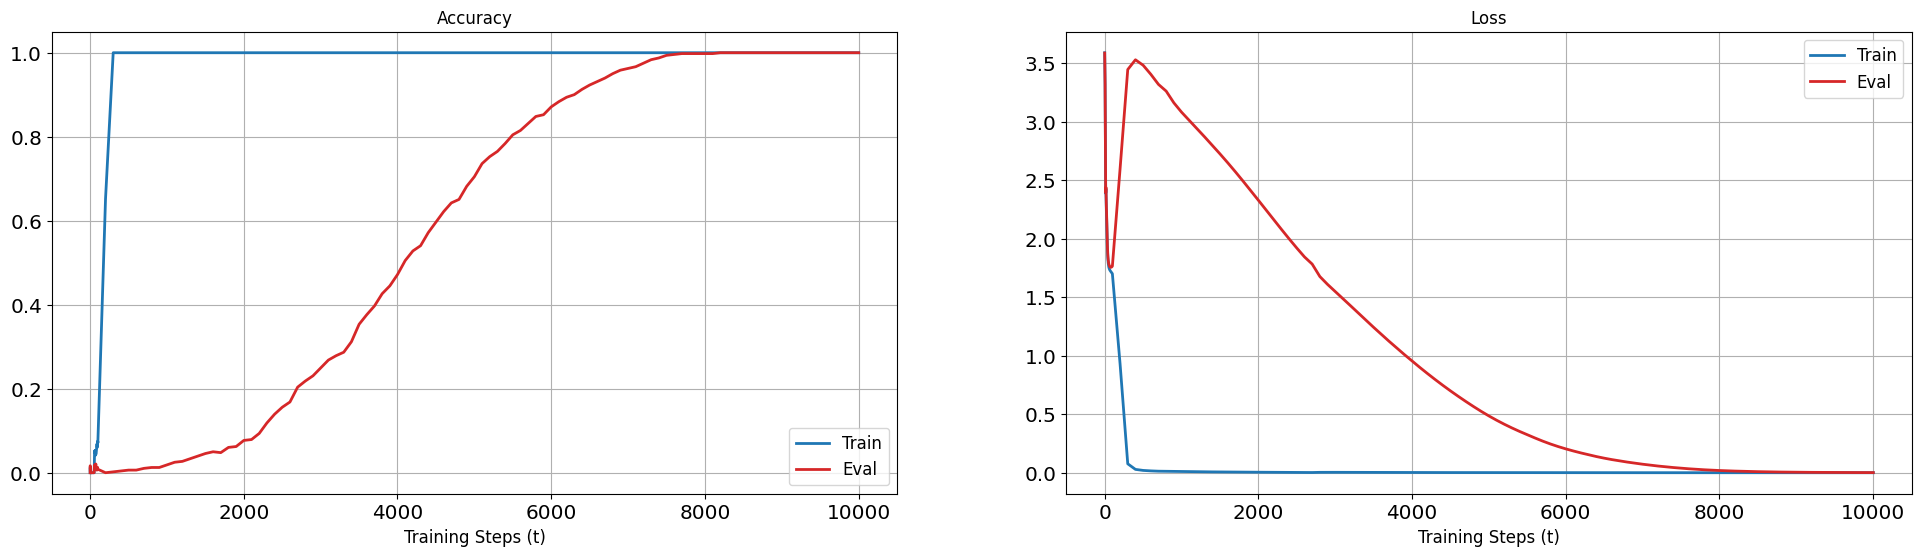

Training ternary operations model...
p : 31
operator : +
r_train : 0.5
train_batch_size : 512
eval_batch_size : 4096
num_workers : 0
model : lstm
num_heads : 4
num_layers : 2
embedding_size : 128
hidden_size : 128
dropout : 0.0
share_embeddings : False
bias_classifier : True
optimizer : adamw
lr : 0.001
weight_decay : 1.0
n_steps : 10001
eval_first : 100
eval_period : 100
print_step : 100
save_model_step : 1000
save_statistic_step : 1000
device : cuda
log_dir : ../logs
verbose : True
exp_name : ternary_operations
operation_orders : 3
Model : LSTMLM(
  (embedding): Embedding(36, 128, padding_idx=35)
  (lstm): LSTM(
    (layers): ModuleList(
      (0-1): 2 x LSTMCell(
        (input_gate): Linear(in_features=256, out_features=128, bias=True)
        (forget_gate): Linear(in_features=256, out_features=128, bias=True)
        (output_gate): Linear(in_features=256, out_features=128, bias=True)
        (candidate_cell): Linear(in_features=256, out_features=128, bias=True)
      )
    )
  )
 

Training:   0%|          | 0/334 [00:00<?, ?it/s]


Train loss : 3.537086 | Train accuracy : 0.021751 | Test loss : 3.537475 | Test accuracy : 0.023296 | lr = 0.001


Training:   1%|          | 3/334 [03:27<6:23:01, 69.43s/it]


Train loss : 1.730811 | Train accuracy : 0.031888 | Test loss : 1.731059 | Test accuracy : 0.032628 | lr = 0.001


Training:   2%|▏         | 6/334 [03:56<2:05:40, 22.99s/it]


Train loss : 1.722491 | Train accuracy : 0.032559 | Test loss : 1.724090 | Test accuracy : 0.031957 | lr = 0.001


Training:   3%|▎         | 10/334 [04:08<40:30,  7.50s/it]


Train loss : 1.721173 | Train accuracy : 0.034237 | Test loss : 1.723091 | Test accuracy : 0.030279 | lr = 0.001


Training:   4%|▍         | 13/334 [04:13<19:41,  3.68s/it]


Train loss : 1.721779 | Train accuracy : 0.032291 | Test loss : 1.723629 | Test accuracy : 0.032226 | lr = 0.001


Training:   5%|▍         | 16/334 [04:21<15:29,  2.92s/it]


Train loss : 1.719620 | Train accuracy : 0.033096 | Test loss : 1.721476 | Test accuracy : 0.031420 | lr = 0.001


Training:   6%|▌         | 20/334 [04:33<16:14,  3.10s/it]


Train loss : 1.719151 | Train accuracy : 0.034036 | Test loss : 1.720653 | Test accuracy : 0.030547 | lr = 0.001


Training:   7%|▋         | 23/334 [04:39<11:30,  2.22s/it]


Train loss : 1.719937 | Train accuracy : 0.032022 | Test loss : 1.721014 | Test accuracy : 0.032158 | lr = 0.001


Training:   8%|▊         | 26/334 [04:47<12:40,  2.47s/it]


Train loss : 1.718806 | Train accuracy : 0.035781 | Test loss : 1.720280 | Test accuracy : 0.028667 | lr = 0.001


Training:   9%|▉         | 30/334 [04:59<15:13,  3.00s/it]


Train loss : 1.718401 | Train accuracy : 0.036520 | Test loss : 1.720056 | Test accuracy : 0.027929 | lr = 0.001


Training:  10%|▉         | 33/334 [05:04<11:03,  2.20s/it]


Train loss : 1.719206 | Train accuracy : 0.033230 | Test loss : 1.721535 | Test accuracy : 0.030749 | lr = 0.001


Training:  11%|█         | 36/334 [05:13<12:14,  2.47s/it]


Train loss : 1.718240 | Train accuracy : 0.033767 | Test loss : 1.720121 | Test accuracy : 0.030279 | lr = 0.001


Training:  12%|█▏        | 40/334 [05:24<14:42,  3.00s/it]


Train loss : 1.717693 | Train accuracy : 0.034774 | Test loss : 1.720602 | Test accuracy : 0.029742 | lr = 0.001


Training:  13%|█▎        | 43/334 [05:30<10:33,  2.18s/it]


Train loss : 1.719028 | Train accuracy : 0.033902 | Test loss : 1.721060 | Test accuracy : 0.030077 | lr = 0.001


Training:  14%|█▍        | 46/334 [05:38<11:46,  2.45s/it]


Train loss : 1.718029 | Train accuracy : 0.034372 | Test loss : 1.720302 | Test accuracy : 0.029540 | lr = 0.001


Training:  15%|█▍        | 50/334 [05:50<13:49,  2.92s/it]


Train loss : 1.717265 | Train accuracy : 0.035714 | Test loss : 1.720857 | Test accuracy : 0.030211 | lr = 0.001


Training:  16%|█▌        | 53/334 [05:55<10:07,  2.16s/it]


Train loss : 1.719203 | Train accuracy : 0.034573 | Test loss : 1.723313 | Test accuracy : 0.030144 | lr = 0.001


Training:  17%|█▋        | 56/334 [06:03<11:28,  2.48s/it]


Train loss : 1.718081 | Train accuracy : 0.036788 | Test loss : 1.720696 | Test accuracy : 0.030614 | lr = 0.001


Training:  18%|█▊        | 60/334 [06:15<13:24,  2.94s/it]


Train loss : 1.717222 | Train accuracy : 0.036654 | Test loss : 1.721126 | Test accuracy : 0.028734 | lr = 0.001


Training:  19%|█▉        | 63/334 [06:21<09:59,  2.21s/it]


Train loss : 1.717210 | Train accuracy : 0.035446 | Test loss : 1.721037 | Test accuracy : 0.030614 | lr = 0.001


Training:  20%|█▉        | 66/334 [06:29<11:08,  2.49s/it]


Train loss : 1.716778 | Train accuracy : 0.036654 | Test loss : 1.721275 | Test accuracy : 0.028130 | lr = 0.001


Training:  21%|██        | 70/334 [06:41<12:59,  2.95s/it]


Train loss : 1.716555 | Train accuracy : 0.037191 | Test loss : 1.720889 | Test accuracy : 0.028466 | lr = 0.001


Training:  22%|██▏       | 73/334 [06:46<09:37,  2.21s/it]


Train loss : 1.717488 | Train accuracy : 0.036050 | Test loss : 1.722734 | Test accuracy : 0.028936 | lr = 0.001


Training:  23%|██▎       | 76/334 [06:55<10:46,  2.50s/it]


Train loss : 1.716633 | Train accuracy : 0.036587 | Test loss : 1.721249 | Test accuracy : 0.027929 | lr = 0.001


Training:  24%|██▍       | 80/334 [07:06<12:20,  2.92s/it]


Train loss : 1.716300 | Train accuracy : 0.036453 | Test loss : 1.722166 | Test accuracy : 0.028734 | lr = 0.001


Training:  25%|██▍       | 83/334 [07:12<09:14,  2.21s/it]


Train loss : 1.716630 | Train accuracy : 0.036587 | Test loss : 1.722088 | Test accuracy : 0.028667 | lr = 0.001


Training:  26%|██▌       | 86/334 [07:20<10:17,  2.49s/it]


Train loss : 1.715556 | Train accuracy : 0.036184 | Test loss : 1.720326 | Test accuracy : 0.029674 | lr = 0.001


Training:  27%|██▋       | 90/334 [07:32<11:32,  2.84s/it]


Train loss : 1.692947 | Train accuracy : 0.042562 | Test loss : 1.697180 | Test accuracy : 0.038604 | lr = 0.001


Training:  28%|██▊       | 93/334 [07:37<08:50,  2.20s/it]


Train loss : 1.451981 | Train accuracy : 0.124329 | Test loss : 1.460102 | Test accuracy : 0.110305 | lr = 0.001


Training:  29%|██▊       | 96/334 [07:45<09:31,  2.40s/it]


Train loss : 1.268955 | Train accuracy : 0.140977 | Test loss : 1.274604 | Test accuracy : 0.141658 | lr = 0.001


Training:  30%|██▉       | 100/334 [07:57<11:01,  2.83s/it]


Train loss : 1.055018 | Train accuracy : 0.360701 | Test loss : 1.061579 | Test accuracy : 0.343941 | lr = 0.001


Training:  31%|███       | 103/334 [08:03<08:35,  2.23s/it]


Train loss : 1.033549 | Train accuracy : 0.139165 | Test loss : 1.039426 | Test accuracy : 0.134072 | lr = 0.001


Training:  32%|███▏      | 106/334 [08:11<09:11,  2.42s/it]


Train loss : 0.902897 | Train accuracy : 0.612446 | Test loss : 0.910021 | Test accuracy : 0.590735 | lr = 0.001


Training:  33%|███▎      | 110/334 [08:23<10:44,  2.88s/it]


Train loss : 0.835731 | Train accuracy : 0.558338 | Test loss : 0.842139 | Test accuracy : 0.549446 | lr = 0.001


Training:  34%|███▍      | 113/334 [08:29<08:09,  2.21s/it]


Train loss : 0.806455 | Train accuracy : 0.658902 | Test loss : 0.814538 | Test accuracy : 0.638939 | lr = 0.001


Training:  35%|███▍      | 116/334 [08:37<08:40,  2.39s/it]


Train loss : 0.803714 | Train accuracy : 0.641917 | Test loss : 0.810517 | Test accuracy : 0.627526 | lr = 0.001


Training:  36%|███▌      | 120/334 [08:48<10:07,  2.84s/it]


Train loss : 0.788354 | Train accuracy : 0.647624 | Test loss : 0.795210 | Test accuracy : 0.632158 | lr = 0.001


Training:  37%|███▋      | 123/334 [08:54<07:56,  2.26s/it]


Train loss : 0.766426 | Train accuracy : 0.759936 | Test loss : 0.773884 | Test accuracy : 0.746022 | lr = 0.001


Training:  38%|███▊      | 126/334 [09:02<08:09,  2.35s/it]


Train loss : 0.762661 | Train accuracy : 0.808204 | Test loss : 0.768963 | Test accuracy : 0.792279 | lr = 0.001


Training:  39%|███▉      | 130/334 [09:14<09:24,  2.77s/it]


Train loss : 0.760134 | Train accuracy : 0.754968 | Test loss : 0.766447 | Test accuracy : 0.739846 | lr = 0.001


Training:  40%|███▉      | 133/334 [09:20<07:27,  2.23s/it]


Train loss : 0.742003 | Train accuracy : 0.816931 | Test loss : 0.749126 | Test accuracy : 0.797583 | lr = 0.001


Training:  41%|████      | 136/334 [09:28<07:43,  2.34s/it]


Train loss : 0.741281 | Train accuracy : 0.810352 | Test loss : 0.748022 | Test accuracy : 0.794495 | lr = 0.001


Training:  42%|████▏     | 140/334 [09:39<08:53,  2.75s/it]


Train loss : 0.732626 | Train accuracy : 0.694012 | Test loss : 0.739230 | Test accuracy : 0.689493 | lr = 0.001


Training:  43%|████▎     | 143/334 [09:45<07:05,  2.23s/it]


Train loss : 0.723095 | Train accuracy : 0.792495 | Test loss : 0.729906 | Test accuracy : 0.778718 | lr = 0.001


Training:  44%|████▎     | 146/334 [09:53<07:07,  2.27s/it]


Train loss : 0.714031 | Train accuracy : 0.753894 | Test loss : 0.720651 | Test accuracy : 0.735482 | lr = 0.001


Training:  45%|████▍     | 150/334 [10:05<08:31,  2.78s/it]


Train loss : 0.713611 | Train accuracy : 0.819952 | Test loss : 0.719925 | Test accuracy : 0.811950 | lr = 0.001


Training:  46%|████▌     | 153/334 [10:11<06:46,  2.25s/it]


Train loss : 0.729520 | Train accuracy : 0.491407 | Test loss : 0.735380 | Test accuracy : 0.488822 | lr = 0.001


Training:  47%|████▋     | 156/334 [10:18<06:47,  2.29s/it]


Train loss : 0.704587 | Train accuracy : 0.593582 | Test loss : 0.710562 | Test accuracy : 0.582209 | lr = 0.001


Training:  48%|████▊     | 160/334 [10:30<08:08,  2.81s/it]


Train loss : 0.751937 | Train accuracy : 0.343112 | Test loss : 0.758285 | Test accuracy : 0.323599 | lr = 0.001


Training:  49%|████▉     | 163/334 [10:36<06:27,  2.27s/it]


Train loss : 0.721788 | Train accuracy : 0.855129 | Test loss : 0.728344 | Test accuracy : 0.842430 | lr = 0.001


Training:  50%|████▉     | 166/334 [10:44<06:26,  2.30s/it]


Train loss : 0.737431 | Train accuracy : 0.793099 | Test loss : 0.743497 | Test accuracy : 0.782746 | lr = 0.001


Training:  51%|█████     | 170/334 [10:56<07:43,  2.83s/it]


Train loss : 0.772538 | Train accuracy : 0.383996 | Test loss : 0.778356 | Test accuracy : 0.374220 | lr = 0.001


Training:  52%|█████▏    | 173/334 [11:02<06:04,  2.26s/it]


Train loss : 0.722621 | Train accuracy : 0.844522 | Test loss : 0.730009 | Test accuracy : 0.827660 | lr = 0.001


Training:  53%|█████▎    | 176/334 [11:10<05:59,  2.28s/it]


Train loss : 0.732989 | Train accuracy : 0.681928 | Test loss : 0.739951 | Test accuracy : 0.653441 | lr = 0.001


Training:  54%|█████▍    | 180/334 [11:22<07:11,  2.80s/it]


Train loss : 0.696785 | Train accuracy : 0.753759 | Test loss : 0.703056 | Test accuracy : 0.743672 | lr = 0.001


Training:  55%|█████▍    | 183/334 [11:28<05:48,  2.31s/it]


Train loss : 0.655026 | Train accuracy : 0.679646 | Test loss : 0.661998 | Test accuracy : 0.658946 | lr = 0.001


Training:  56%|█████▌    | 186/334 [11:35<05:31,  2.24s/it]


Train loss : 0.618106 | Train accuracy : 0.917629 | Test loss : 0.624401 | Test accuracy : 0.911111 | lr = 0.001


Training:  57%|█████▋    | 190/334 [11:47<06:33,  2.73s/it]


Train loss : 0.617594 | Train accuracy : 0.889299 | Test loss : 0.623837 | Test accuracy : 0.877006 | lr = 0.001


Training:  58%|█████▊    | 193/334 [11:53<05:16,  2.25s/it]


Train loss : 0.617942 | Train accuracy : 0.912124 | Test loss : 0.624431 | Test accuracy : 0.903659 | lr = 0.001


Training:  59%|█████▊    | 196/334 [12:01<05:08,  2.23s/it]


Train loss : 0.626880 | Train accuracy : 0.821630 | Test loss : 0.633831 | Test accuracy : 0.803558 | lr = 0.001


Training:  60%|█████▉    | 200/334 [12:13<06:12,  2.78s/it]


Train loss : 0.627455 | Train accuracy : 0.805988 | Test loss : 0.633939 | Test accuracy : 0.792615 | lr = 0.001


Training:  61%|██████    | 203/334 [12:19<04:59,  2.29s/it]


Train loss : 0.592994 | Train accuracy : 0.954283 | Test loss : 0.599221 | Test accuracy : 0.947566 | lr = 0.001


Training:  62%|██████▏   | 206/334 [12:26<04:48,  2.26s/it]


Train loss : 0.605041 | Train accuracy : 0.949987 | Test loss : 0.611947 | Test accuracy : 0.942934 | lr = 0.001


Training:  63%|██████▎   | 210/334 [12:38<05:52,  2.84s/it]


Train loss : 0.601771 | Train accuracy : 0.938373 | Test loss : 0.608403 | Test accuracy : 0.927694 | lr = 0.001


Training:  64%|██████▍   | 213/334 [12:45<04:38,  2.30s/it]


Train loss : 0.604837 | Train accuracy : 0.940118 | Test loss : 0.612154 | Test accuracy : 0.929507 | lr = 0.001


Training:  65%|██████▍   | 216/334 [12:52<04:27,  2.26s/it]


Train loss : 0.613321 | Train accuracy : 0.945086 | Test loss : 0.620008 | Test accuracy : 0.935482 | lr = 0.001


Training:  66%|██████▌   | 220/334 [13:04<05:14,  2.76s/it]


Train loss : 0.596823 | Train accuracy : 0.947503 | Test loss : 0.603372 | Test accuracy : 0.939241 | lr = 0.001


Training:  67%|██████▋   | 223/334 [13:10<04:13,  2.28s/it]


Train loss : 0.614928 | Train accuracy : 0.894267 | Test loss : 0.620710 | Test accuracy : 0.887748 | lr = 0.001


Training:  68%|██████▊   | 226/334 [13:17<04:04,  2.26s/it]


Train loss : 0.594931 | Train accuracy : 0.948375 | Test loss : 0.601271 | Test accuracy : 0.943135 | lr = 0.001


Training:  69%|██████▉   | 230/334 [13:29<04:47,  2.76s/it]


Train loss : 0.604252 | Train accuracy : 0.920717 | Test loss : 0.611114 | Test accuracy : 0.910238 | lr = 0.001


Training:  70%|██████▉   | 233/334 [13:35<03:55,  2.33s/it]


Train loss : 0.606444 | Train accuracy : 0.907223 | Test loss : 0.612922 | Test accuracy : 0.894864 | lr = 0.001


Training:  71%|███████   | 236/334 [13:43<03:45,  2.30s/it]


Train loss : 0.594764 | Train accuracy : 0.948443 | Test loss : 0.600734 | Test accuracy : 0.942330 | lr = 0.001


Training:  72%|███████▏  | 240/334 [13:55<04:23,  2.80s/it]


Train loss : 0.606626 | Train accuracy : 0.821429 | Test loss : 0.613097 | Test accuracy : 0.814032 | lr = 0.001


Training:  73%|███████▎  | 243/334 [14:01<03:31,  2.33s/it]


Train loss : 0.618494 | Train accuracy : 0.575792 | Test loss : 0.625297 | Test accuracy : 0.557435 | lr = 0.001


Training:  74%|███████▎  | 246/334 [14:09<03:20,  2.28s/it]


Train loss : 0.560674 | Train accuracy : 0.962137 | Test loss : 0.567589 | Test accuracy : 0.957704 | lr = 0.001


Training:  75%|███████▍  | 250/334 [14:21<03:52,  2.77s/it]


Train loss : 0.585189 | Train accuracy : 0.921053 | Test loss : 0.592962 | Test accuracy : 0.906613 | lr = 0.001


Training:  76%|███████▌  | 253/334 [14:27<03:08,  2.33s/it]


Train loss : 0.577260 | Train accuracy : 0.934009 | Test loss : 0.583881 | Test accuracy : 0.926687 | lr = 0.001


Training:  77%|███████▋  | 256/334 [14:34<02:57,  2.28s/it]


Train loss : 0.572050 | Train accuracy : 0.965763 | Test loss : 0.578556 | Test accuracy : 0.956294 | lr = 0.001


Training:  78%|███████▊  | 260/334 [14:46<03:26,  2.78s/it]


Train loss : 0.588944 | Train accuracy : 0.922798 | Test loss : 0.594430 | Test accuracy : 0.915542 | lr = 0.001


Training:  79%|███████▊  | 263/334 [14:52<02:45,  2.33s/it]


Train loss : 0.599111 | Train accuracy : 0.844052 | Test loss : 0.605168 | Test accuracy : 0.826519 | lr = 0.001


Training:  80%|███████▉  | 266/334 [15:00<02:33,  2.25s/it]


Train loss : 0.587771 | Train accuracy : 0.835661 | Test loss : 0.594065 | Test accuracy : 0.829809 | lr = 0.001


Training:  81%|████████  | 270/334 [15:12<02:56,  2.76s/it]


Train loss : 0.568193 | Train accuracy : 0.955827 | Test loss : 0.573859 | Test accuracy : 0.950856 | lr = 0.001


Training:  82%|████████▏ | 273/334 [15:18<02:21,  2.33s/it]


Train loss : 0.570610 | Train accuracy : 0.946429 | Test loss : 0.576738 | Test accuracy : 0.941860 | lr = 0.001


Training:  83%|████████▎ | 276/334 [15:25<02:10,  2.25s/it]


Train loss : 0.578811 | Train accuracy : 0.933002 | Test loss : 0.584928 | Test accuracy : 0.926485 | lr = 0.001


Training:  84%|████████▍ | 280/334 [15:37<02:31,  2.81s/it]


Train loss : 0.576066 | Train accuracy : 0.936090 | Test loss : 0.583485 | Test accuracy : 0.919570 | lr = 0.001


Training:  85%|████████▍ | 283/334 [15:43<02:01,  2.38s/it]


Train loss : 0.574038 | Train accuracy : 0.936426 | Test loss : 0.580831 | Test accuracy : 0.923666 | lr = 0.001


Training:  86%|████████▌ | 286/334 [15:51<01:49,  2.29s/it]


Train loss : 0.571032 | Train accuracy : 0.924476 | Test loss : 0.577436 | Test accuracy : 0.917086 | lr = 0.001


Training:  87%|████████▋ | 290/334 [16:03<02:02,  2.78s/it]


Train loss : 0.575833 | Train accuracy : 0.926826 | Test loss : 0.582257 | Test accuracy : 0.914602 | lr = 0.001


Training:  88%|████████▊ | 293/334 [16:09<01:36,  2.36s/it]


Train loss : 0.575311 | Train accuracy : 0.917763 | Test loss : 0.581609 | Test accuracy : 0.904733 | lr = 0.001


Training:  89%|████████▊ | 296/334 [16:16<01:26,  2.27s/it]


Train loss : 0.569026 | Train accuracy : 0.937903 | Test loss : 0.575056 | Test accuracy : 0.928902 | lr = 0.001


Training:  90%|████████▉ | 300/334 [16:29<01:36,  2.83s/it]


Train loss : 0.550572 | Train accuracy : 0.956901 | Test loss : 0.557273 | Test accuracy : 0.951863 | lr = 0.001


Training:  91%|█████████ | 303/334 [16:35<01:13,  2.37s/it]


Train loss : 0.570886 | Train accuracy : 0.840024 | Test loss : 0.576299 | Test accuracy : 0.834173 | lr = 0.001


Training:  92%|█████████▏| 306/334 [16:42<01:04,  2.29s/it]


Train loss : 0.546162 | Train accuracy : 0.899839 | Test loss : 0.552465 | Test accuracy : 0.887412 | lr = 0.001


Training:  93%|█████████▎| 310/334 [16:54<01:06,  2.78s/it]


Train loss : 0.555730 | Train accuracy : 0.816125 | Test loss : 0.562204 | Test accuracy : 0.802618 | lr = 0.001


Training:  94%|█████████▎| 313/334 [17:00<00:49,  2.37s/it]


Train loss : 0.550291 | Train accuracy : 0.908432 | Test loss : 0.556370 | Test accuracy : 0.894797 | lr = 0.001


Training:  95%|█████████▍| 316/334 [17:08<00:40,  2.27s/it]


Train loss : 0.553178 | Train accuracy : 0.912460 | Test loss : 0.559408 | Test accuracy : 0.898221 | lr = 0.001


Training:  96%|█████████▌| 320/334 [17:20<00:39,  2.79s/it]


Train loss : 0.547892 | Train accuracy : 0.867817 | Test loss : 0.554460 | Test accuracy : 0.854381 | lr = 0.001


Training:  97%|█████████▋| 323/334 [17:26<00:25,  2.33s/it]


Train loss : 0.545174 | Train accuracy : 0.902054 | Test loss : 0.551769 | Test accuracy : 0.890366 | lr = 0.001


Training:  98%|█████████▊| 326/334 [17:33<00:18,  2.26s/it]


Train loss : 0.544150 | Train accuracy : 0.908700 | Test loss : 0.550231 | Test accuracy : 0.897617 | lr = 0.001


Training:  99%|█████████▉| 330/334 [17:45<00:11,  2.81s/it]


Train loss : 0.550570 | Train accuracy : 0.897288 | Test loss : 0.556246 | Test accuracy : 0.885331 | lr = 0.001


Training: 100%|█████████▉| 333/334 [17:51<00:02,  2.28s/it]


Train loss : 0.567945 | Train accuracy : 0.616407 | Test loss : 0.576014 | Test accuracy : 0.595569 | lr = 0.001


Training: 100%|██████████| 334/334 [17:57<00:00,  3.23s/it]


Train loss : 0.535595 | Train accuracy : 0.880303 | Test loss : 0.541390 | Test accuracy : 0.870762 | lr = 0.001


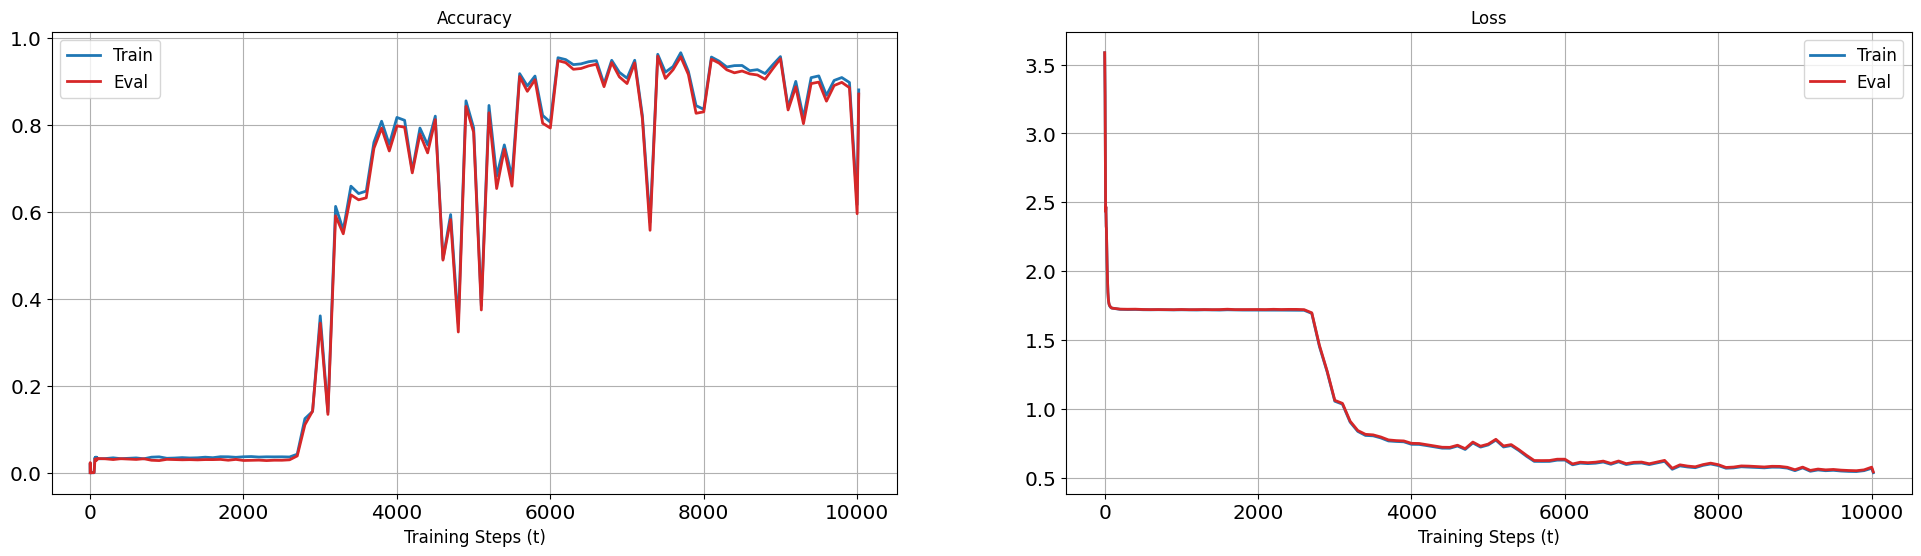

In [9]:
import torch
from train import Arguments, train, train_m_models
from plotter import plot_loss_accs

# Create separate argument objects for binary and ternary operations
args_binary = Arguments()
args_ternary = Arguments()

# Common settings for both
common_settings = {
    # Data
    'p': 31,
    'operator': "+",
    'r_train': .5,
    'train_batch_size': 512,
    'eval_batch_size': 2**12,
    'num_workers': 0,
    # Model
    'model': 'lstm',
    'num_heads': 4,
    'num_layers': 2,
    'embedding_size': 2**7,
    'hidden_size': 2**7,
    'dropout': 0.0,
    'share_embeddings': False,
    'bias_classifier': True,
    # Optimization
    'optimizer': 'adamw',
    'lr': 1e-3,
    'weight_decay': 1e-0,
    # Training
    'n_steps': 10**4 + 1,
    'eval_first': 10**2,
    'eval_period': 10**2,
    'print_step': 10**2,
    'save_model_step': 10**3,
    'save_statistic_step': 10**3,
    # Experiment
    'device': "cuda" if torch.cuda.is_available() else "cpu",
    'log_dir': '../logs',
    'verbose': True
}

# Apply common settings
for key, value in common_settings.items():
    setattr(args_binary, key, value)
    setattr(args_ternary, key, value)

# Set operation-specific settings
args_binary.exp_name = "binary_operations"
args_binary.operation_orders = 2  # Binary operations

args_ternary.exp_name = "ternary_operations"
args_ternary.operation_orders = 3  # Ternary operations

# Train and plot for binary operations
print("Training binary operations model...")
binary_metrics, _ = train(args_binary)
plot_loss_accs(binary_metrics, multiple_runs=False, log_x=False, log_y=False,
               fileName=args_binary.exp_name, filePath=None, show=True)

# Train and plot for ternary operations
print("Training ternary operations model...")
ternary_metrics, _ = train(args_ternary)
plot_loss_accs(ternary_metrics, multiple_runs=False, log_x=False, log_y=False,
               fileName=args_ternary.exp_name, filePath=None, show=True)

# Optional: Train multiple models for each case
if False:  # Set to True if you want to run multiple trials
    print("Training multiple binary operations models...")
    _, all_binary_metrics, _ = train_m_models(args_binary, M=2, seeds=[0, 42])
    plot_loss_accs(all_binary_metrics, multiple_runs=True, log_x=False, log_y=False,
                   fileName=args_binary.exp_name+"_multi", filePath=None, show=True)

    print("Training multiple ternary operations models...")
    _, all_ternary_metrics, _ = train_m_models(args_ternary, M=2, seeds=[0, 42])
    plot_loss_accs(all_ternary_metrics, multiple_runs=True, log_x=False, log_y=False,
                   fileName=args_ternary.exp_name+"_multi", filePath=None, show=True)

#GPT

Training binary operations model...
p : 31
operator : +
r_train : 0.5
train_batch_size : 512
eval_batch_size : 4096
num_workers : 0
model : gpt
num_heads : 4
num_layers : 2
embedding_size : 128
hidden_size : 128
dropout : 0.0
share_embeddings : False
bias_classifier : True
optimizer : adamw
lr : 0.001
weight_decay : 1.0
n_steps : 10001
eval_first : 100
eval_period : 100
print_step : 100
save_model_step : 1000
save_statistic_step : 1000
device : cuda
log_dir : ../logs
verbose : True
exp_name : binary_operations
operation_orders : 2
Model : GPT(
  (embedding): GPTEmbedding(
    (tokens): Embedding(36, 128, padding_idx=35)
  )
  (decoder): Decoder(
    (blocks): ModuleList(
      (0-1): 2 x Block(
        (self_attn): MultiHeadedAttention(
          (W_Q): Linear(in_features=128, out_features=128, bias=True)
          (W_K): Linear(in_features=128, out_features=128, bias=True)
          (W_V): Linear(in_features=128, out_features=128, bias=True)
          (W_O): Linear(in_features=128, ou

Training:   0%|          | 0/10001 [00:00<?, ?it/s]


Train loss : 2.826017 | Train accuracy : 0.000000 | Test loss : 2.828310 | Test accuracy : 0.000000 | lr = 0.001


Training:   1%|          | 102/10001 [00:18<19:57,  8.27it/s]


Train loss : 0.028331 | Train accuracy : 1.000000 | Test loss : 2.023314 | Test accuracy : 0.376299 | lr = 0.001


Training:   2%|▏         | 201/10001 [00:24<10:20, 15.80it/s]


Train loss : 0.009409 | Train accuracy : 1.000000 | Test loss : 1.916045 | Test accuracy : 0.424116 | lr = 0.001


Training:   3%|▎         | 303/10001 [00:30<08:46, 18.42it/s]


Train loss : 0.007205 | Train accuracy : 1.000000 | Test loss : 1.799387 | Test accuracy : 0.432432 | lr = 0.001


Training:   4%|▍         | 402/10001 [00:35<08:39, 18.47it/s]


Train loss : 0.006035 | Train accuracy : 1.000000 | Test loss : 1.714939 | Test accuracy : 0.442827 | lr = 0.001


Training:   5%|▌         | 504/10001 [00:41<08:43, 18.13it/s]


Train loss : 0.004808 | Train accuracy : 1.000000 | Test loss : 1.732342 | Test accuracy : 0.444906 | lr = 0.001


Training:   6%|▌         | 603/10001 [00:45<08:23, 18.66it/s]


Train loss : 0.005077 | Train accuracy : 1.000000 | Test loss : 1.653131 | Test accuracy : 0.451143 | lr = 0.001


Training:   7%|▋         | 702/10001 [00:51<11:51, 13.06it/s]


Train loss : 0.004625 | Train accuracy : 1.000000 | Test loss : 1.617282 | Test accuracy : 0.459459 | lr = 0.001


Training:   8%|▊         | 804/10001 [00:56<07:57, 19.24it/s]


Train loss : 0.003150 | Train accuracy : 1.000000 | Test loss : 1.722133 | Test accuracy : 0.446985 | lr = 0.001


Training:   9%|▉         | 904/10001 [01:01<07:53, 19.20it/s]


Train loss : 0.003714 | Train accuracy : 1.000000 | Test loss : 1.639329 | Test accuracy : 0.455301 | lr = 0.001


Training:  10%|█         | 1003/10001 [01:07<08:24, 17.82it/s]


Train loss : 0.003549 | Train accuracy : 1.000000 | Test loss : 1.607320 | Test accuracy : 0.465696 | lr = 0.001


Training:  11%|█         | 1102/10001 [01:12<07:52, 18.82it/s]


Train loss : 0.002322 | Train accuracy : 1.000000 | Test loss : 1.720436 | Test accuracy : 0.455301 | lr = 0.001


Training:  12%|█▏        | 1201/10001 [01:18<12:43, 11.52it/s]


Train loss : 0.002859 | Train accuracy : 1.000000 | Test loss : 1.626716 | Test accuracy : 0.467775 | lr = 0.001


Training:  13%|█▎        | 1302/10001 [01:23<07:54, 18.35it/s]


Train loss : 0.083630 | Train accuracy : 0.995833 | Test loss : 1.874765 | Test accuracy : 0.345114 | lr = 0.001


Training:  14%|█▍        | 1403/10001 [01:28<07:27, 19.21it/s]


Train loss : 0.002042 | Train accuracy : 1.000000 | Test loss : 1.711380 | Test accuracy : 0.459459 | lr = 0.001


Training:  15%|█▌        | 1504/10001 [01:34<07:21, 19.24it/s]


Train loss : 0.002390 | Train accuracy : 1.000000 | Test loss : 1.638120 | Test accuracy : 0.476091 | lr = 0.001


Training:  16%|█▌        | 1602/10001 [01:39<07:32, 18.57it/s]


Train loss : 0.003638 | Train accuracy : 1.000000 | Test loss : 1.724602 | Test accuracy : 0.449064 | lr = 0.001


Training:  17%|█▋        | 1702/10001 [01:45<08:38, 16.02it/s]


Train loss : 0.001945 | Train accuracy : 1.000000 | Test loss : 1.677225 | Test accuracy : 0.480249 | lr = 0.001


Training:  18%|█▊        | 1804/10001 [01:50<07:11, 18.99it/s]


Train loss : 0.123350 | Train accuracy : 0.954167 | Test loss : 1.983421 | Test accuracy : 0.293139 | lr = 0.001


Training:  19%|█▉        | 1902/10001 [01:55<09:30, 14.20it/s]


Train loss : 0.001526 | Train accuracy : 1.000000 | Test loss : 1.749936 | Test accuracy : 0.471933 | lr = 0.001


Training:  20%|██        | 2001/10001 [02:00<07:56, 16.81it/s]


Train loss : 0.002308 | Train accuracy : 1.000000 | Test loss : 1.659032 | Test accuracy : 0.482328 | lr = 0.001


Training:  21%|██        | 2102/10001 [02:06<07:08, 18.43it/s]


Train loss : 0.001276 | Train accuracy : 1.000000 | Test loss : 1.803666 | Test accuracy : 0.471933 | lr = 0.001


Training:  22%|██▏       | 2203/10001 [02:11<07:04, 18.36it/s]


Train loss : 0.001605 | Train accuracy : 1.000000 | Test loss : 1.727698 | Test accuracy : 0.480249 | lr = 0.001


Training:  23%|██▎       | 2303/10001 [02:16<06:45, 18.97it/s]


Train loss : 0.001279 | Train accuracy : 1.000000 | Test loss : 1.768706 | Test accuracy : 0.484407 | lr = 0.001


Training:  24%|██▍       | 2403/10001 [02:22<09:29, 13.33it/s]


Train loss : 0.001196 | Train accuracy : 1.000000 | Test loss : 1.816625 | Test accuracy : 0.478170 | lr = 0.001


Training:  25%|██▌       | 2504/10001 [02:27<06:30, 19.20it/s]


Train loss : 0.013650 | Train accuracy : 1.000000 | Test loss : 1.749391 | Test accuracy : 0.465696 | lr = 0.001


Training:  26%|██▌       | 2600/10001 [02:32<06:44, 18.31it/s]


Train loss : 0.008306 | Train accuracy : 1.000000 | Test loss : 1.547201 | Test accuracy : 0.484407 | lr = 0.001


Training:  27%|██▋       | 2703/10001 [02:38<06:17, 19.35it/s]


Train loss : 0.000930 | Train accuracy : 1.000000 | Test loss : 1.883340 | Test accuracy : 0.480249 | lr = 0.001


Training:  28%|██▊       | 2804/10001 [02:43<06:17, 19.06it/s]


Train loss : 0.005969 | Train accuracy : 1.000000 | Test loss : 1.763073 | Test accuracy : 0.469854 | lr = 0.001


Training:  29%|██▉       | 2903/10001 [02:49<07:23, 16.02it/s]


Train loss : 0.255641 | Train accuracy : 1.000000 | Test loss : 1.377762 | Test accuracy : 0.463617 | lr = 0.001


Training:  30%|███       | 3002/10001 [02:54<07:03, 16.52it/s]


Train loss : 0.000944 | Train accuracy : 1.000000 | Test loss : 1.867797 | Test accuracy : 0.488566 | lr = 0.001


Training:  31%|███       | 3103/10001 [03:00<08:53, 12.92it/s]


Train loss : 0.007043 | Train accuracy : 1.000000 | Test loss : 1.668499 | Test accuracy : 0.480249 | lr = 0.001


Training:  32%|███▏      | 3202/10001 [03:05<06:09, 18.41it/s]


Train loss : 0.000834 | Train accuracy : 1.000000 | Test loss : 1.838326 | Test accuracy : 0.488566 | lr = 0.001


Training:  33%|███▎      | 3304/10001 [03:10<05:52, 19.00it/s]


Train loss : 0.000896 | Train accuracy : 1.000000 | Test loss : 1.847453 | Test accuracy : 0.490644 | lr = 0.001


Training:  34%|███▍      | 3403/10001 [03:16<05:48, 18.96it/s]


Train loss : 0.003478 | Train accuracy : 1.000000 | Test loss : 1.658815 | Test accuracy : 0.486486 | lr = 0.001


Training:  35%|███▌      | 3502/10001 [03:21<05:49, 18.59it/s]


Train loss : 0.000765 | Train accuracy : 1.000000 | Test loss : 1.815481 | Test accuracy : 0.492723 | lr = 0.001


Training:  36%|███▌      | 3602/10001 [03:26<07:58, 13.36it/s]


Train loss : 0.007336 | Train accuracy : 1.000000 | Test loss : 1.721474 | Test accuracy : 0.471933 | lr = 0.001


Training:  37%|███▋      | 3702/10001 [03:32<05:50, 17.96it/s]


Train loss : 0.000709 | Train accuracy : 1.000000 | Test loss : 1.797749 | Test accuracy : 0.492723 | lr = 0.001


Training:  38%|███▊      | 3801/10001 [03:37<05:41, 18.15it/s]


Train loss : 0.002937 | Train accuracy : 1.000000 | Test loss : 1.785373 | Test accuracy : 0.474012 | lr = 0.001


Training:  39%|███▉      | 3903/10001 [03:43<05:38, 18.00it/s]


Train loss : 0.000594 | Train accuracy : 1.000000 | Test loss : 1.794598 | Test accuracy : 0.490644 | lr = 0.001


Training:  40%|████      | 4001/10001 [03:48<05:57, 16.80it/s]


Train loss : 0.001870 | Train accuracy : 1.000000 | Test loss : 1.658222 | Test accuracy : 0.494803 | lr = 0.001


Training:  41%|████      | 4102/10001 [03:54<06:22, 15.42it/s]


Train loss : 0.003718 | Train accuracy : 1.000000 | Test loss : 1.685041 | Test accuracy : 0.486486 | lr = 0.001


Training:  42%|████▏     | 4202/10001 [03:59<05:15, 18.40it/s]


Train loss : 0.000824 | Train accuracy : 1.000000 | Test loss : 1.683625 | Test accuracy : 0.492723 | lr = 0.001


Training:  43%|████▎     | 4302/10001 [04:04<06:31, 14.57it/s]


Train loss : 0.003575 | Train accuracy : 1.000000 | Test loss : 1.518637 | Test accuracy : 0.492723 | lr = 0.001


Training:  44%|████▍     | 4403/10001 [04:10<04:49, 19.36it/s]


Train loss : 0.000542 | Train accuracy : 1.000000 | Test loss : 1.629744 | Test accuracy : 0.498960 | lr = 0.001


Training:  45%|████▌     | 4504/10001 [04:15<04:49, 19.00it/s]


Train loss : 0.017077 | Train accuracy : 1.000000 | Test loss : 1.493881 | Test accuracy : 0.488566 | lr = 0.001


Training:  46%|████▌     | 4603/10001 [04:21<04:47, 18.78it/s]


Train loss : 0.003948 | Train accuracy : 1.000000 | Test loss : 1.460610 | Test accuracy : 0.511434 | lr = 0.001


Training:  47%|████▋     | 4704/10001 [04:26<04:46, 18.51it/s]


Train loss : 0.000529 | Train accuracy : 1.000000 | Test loss : 1.438620 | Test accuracy : 0.515593 | lr = 0.001


Training:  48%|████▊     | 4803/10001 [04:31<06:36, 13.10it/s]


Train loss : 0.002629 | Train accuracy : 1.000000 | Test loss : 1.285895 | Test accuracy : 0.521830 | lr = 0.001


Training:  49%|████▉     | 4903/10001 [04:36<04:25, 19.18it/s]


Train loss : 0.012718 | Train accuracy : 1.000000 | Test loss : 1.298937 | Test accuracy : 0.517672 | lr = 0.001


Training:  50%|█████     | 5002/10001 [04:42<04:50, 17.23it/s]


Train loss : 0.000529 | Train accuracy : 1.000000 | Test loss : 1.235176 | Test accuracy : 0.536383 | lr = 0.001


Training:  51%|█████     | 5103/10001 [04:48<04:16, 19.08it/s]


Train loss : 0.023735 | Train accuracy : 0.997917 | Test loss : 1.203223 | Test accuracy : 0.513514 | lr = 0.001


Training:  52%|█████▏    | 5203/10001 [04:53<04:21, 18.38it/s]


Train loss : 0.002205 | Train accuracy : 1.000000 | Test loss : 1.039973 | Test accuracy : 0.544699 | lr = 0.001


Training:  53%|█████▎    | 5303/10001 [04:59<04:59, 15.69it/s]


Train loss : 0.000497 | Train accuracy : 1.000000 | Test loss : 0.966488 | Test accuracy : 0.586279 | lr = 0.001


Training:  54%|█████▍    | 5403/10001 [05:04<04:06, 18.67it/s]


Train loss : 0.023062 | Train accuracy : 0.995833 | Test loss : 0.905862 | Test accuracy : 0.569647 | lr = 0.001


Training:  55%|█████▌    | 5501/10001 [05:09<05:37, 13.34it/s]


Train loss : 0.014670 | Train accuracy : 0.997917 | Test loss : 0.913826 | Test accuracy : 0.596674 | lr = 0.001


Training:  56%|█████▌    | 5603/10001 [05:14<03:54, 18.73it/s]


Train loss : 0.000428 | Train accuracy : 1.000000 | Test loss : 0.658559 | Test accuracy : 0.683992 | lr = 0.001


Training:  57%|█████▋    | 5702/10001 [05:19<03:57, 18.07it/s]


Train loss : 0.002574 | Train accuracy : 1.000000 | Test loss : 0.587554 | Test accuracy : 0.686071 | lr = 0.001


Training:  58%|█████▊    | 5803/10001 [05:26<03:47, 18.45it/s]


Train loss : 0.014262 | Train accuracy : 0.993750 | Test loss : 0.585931 | Test accuracy : 0.719335 | lr = 0.001


Training:  59%|█████▉    | 5904/10001 [05:31<03:34, 19.14it/s]


Train loss : 0.000426 | Train accuracy : 1.000000 | Test loss : 0.397100 | Test accuracy : 0.790021 | lr = 0.001


Training:  60%|██████    | 6001/10001 [05:36<06:19, 10.54it/s]


Train loss : 0.007655 | Train accuracy : 1.000000 | Test loss : 0.475946 | Test accuracy : 0.723493 | lr = 0.001


Training:  61%|██████    | 6102/10001 [05:42<03:29, 18.64it/s]


Train loss : 0.000426 | Train accuracy : 1.000000 | Test loss : 0.251486 | Test accuracy : 0.862786 | lr = 0.001


Training:  62%|██████▏   | 6203/10001 [05:47<03:24, 18.62it/s]


Train loss : 0.000480 | Train accuracy : 1.000000 | Test loss : 0.223944 | Test accuracy : 0.877339 | lr = 0.001


Training:  63%|██████▎   | 6302/10001 [05:52<03:18, 18.61it/s]


Train loss : 0.003656 | Train accuracy : 1.000000 | Test loss : 0.208986 | Test accuracy : 0.862786 | lr = 0.001


Training:  64%|██████▍   | 6402/10001 [05:57<03:17, 18.26it/s]


Train loss : 0.000301 | Train accuracy : 1.000000 | Test loss : 0.137130 | Test accuracy : 0.920998 | lr = 0.001


Training:  65%|██████▌   | 6502/10001 [06:03<03:58, 14.66it/s]


Train loss : 0.000478 | Train accuracy : 1.000000 | Test loss : 0.117416 | Test accuracy : 0.923077 | lr = 0.001


Training:  66%|██████▌   | 6604/10001 [06:09<03:16, 17.27it/s]


Train loss : 0.002662 | Train accuracy : 1.000000 | Test loss : 0.176359 | Test accuracy : 0.904366 | lr = 0.001


Training:  67%|██████▋   | 6702/10001 [06:14<03:51, 14.26it/s]


Train loss : 0.000251 | Train accuracy : 1.000000 | Test loss : 0.071795 | Test accuracy : 0.956341 | lr = 0.001


Training:  68%|██████▊   | 6804/10001 [06:19<02:47, 19.10it/s]


Train loss : 0.000449 | Train accuracy : 1.000000 | Test loss : 0.061635 | Test accuracy : 0.964657 | lr = 0.001


Training:  69%|██████▉   | 6902/10001 [06:24<02:46, 18.59it/s]


Train loss : 0.000317 | Train accuracy : 1.000000 | Test loss : 0.058020 | Test accuracy : 0.962578 | lr = 0.001


Training:  70%|███████   | 7003/10001 [06:31<02:58, 16.78it/s]


Train loss : 0.000463 | Train accuracy : 1.000000 | Test loss : 0.042099 | Test accuracy : 0.977131 | lr = 0.001


Training:  71%|███████   | 7102/10001 [06:36<02:39, 18.13it/s]


Train loss : 0.006263 | Train accuracy : 1.000000 | Test loss : 0.116620 | Test accuracy : 0.927235 | lr = 0.001


Training:  72%|███████▏  | 7201/10001 [06:41<04:03, 11.49it/s]


Train loss : 0.000211 | Train accuracy : 1.000000 | Test loss : 0.045287 | Test accuracy : 0.975052 | lr = 0.001


Training:  73%|███████▎  | 7303/10001 [06:46<02:18, 19.41it/s]


Train loss : 0.000404 | Train accuracy : 1.000000 | Test loss : 0.027532 | Test accuracy : 0.983368 | lr = 0.001


Training:  74%|███████▍  | 7402/10001 [06:51<02:20, 18.48it/s]


Train loss : 0.009202 | Train accuracy : 0.997917 | Test loss : 0.092635 | Test accuracy : 0.943867 | lr = 0.001


Training:  75%|███████▌  | 7504/10001 [06:57<02:20, 17.83it/s]


Train loss : 0.000271 | Train accuracy : 1.000000 | Test loss : 0.029088 | Test accuracy : 0.983368 | lr = 0.001


Training:  76%|███████▌  | 7602/10001 [07:02<02:08, 18.70it/s]


Train loss : 0.000627 | Train accuracy : 1.000000 | Test loss : 0.024564 | Test accuracy : 0.991684 | lr = 0.001


Training:  77%|███████▋  | 7703/10001 [07:08<02:11, 17.50it/s]


Train loss : 0.000441 | Train accuracy : 1.000000 | Test loss : 0.012174 | Test accuracy : 0.993763 | lr = 0.001


Training:  78%|███████▊  | 7804/10001 [07:13<01:53, 19.30it/s]


Train loss : 0.003636 | Train accuracy : 1.000000 | Test loss : 0.095868 | Test accuracy : 0.941788 | lr = 0.001


Training:  79%|███████▉  | 7901/10001 [07:18<02:35, 13.48it/s]


Train loss : 0.000170 | Train accuracy : 1.000000 | Test loss : 0.022877 | Test accuracy : 0.989605 | lr = 0.001


Training:  80%|████████  | 8003/10001 [07:24<01:58, 16.85it/s]


Train loss : 0.000356 | Train accuracy : 1.000000 | Test loss : 0.014611 | Test accuracy : 0.989605 | lr = 0.001


Training:  81%|████████  | 8103/10001 [07:30<01:45, 18.05it/s]


Train loss : 0.000296 | Train accuracy : 1.000000 | Test loss : 0.007721 | Test accuracy : 0.991684 | lr = 0.001


Training:  82%|████████▏ | 8203/10001 [07:36<01:36, 18.59it/s]


Train loss : 0.017612 | Train accuracy : 1.000000 | Test loss : 0.132756 | Test accuracy : 0.923077 | lr = 0.001


Training:  83%|████████▎ | 8302/10001 [07:41<01:35, 17.79it/s]


Train loss : 0.000183 | Train accuracy : 1.000000 | Test loss : 0.023730 | Test accuracy : 0.989605 | lr = 0.001


Training:  84%|████████▍ | 8403/10001 [07:47<01:39, 16.05it/s]


Train loss : 0.000354 | Train accuracy : 1.000000 | Test loss : 0.011210 | Test accuracy : 0.989605 | lr = 0.001


Training:  85%|████████▌ | 8504/10001 [07:52<01:27, 17.17it/s]


Train loss : 0.000215 | Train accuracy : 1.000000 | Test loss : 0.008288 | Test accuracy : 0.993763 | lr = 0.001


Training:  86%|████████▌ | 8603/10001 [07:57<01:36, 14.42it/s]


Train loss : 0.000386 | Train accuracy : 1.000000 | Test loss : 0.006631 | Test accuracy : 0.995842 | lr = 0.001


Training:  87%|████████▋ | 8703/10001 [08:03<01:11, 18.07it/s]


Train loss : 0.000218 | Train accuracy : 1.000000 | Test loss : 0.032522 | Test accuracy : 0.987526 | lr = 0.001


Training:  88%|████████▊ | 8802/10001 [08:08<01:06, 17.91it/s]


Train loss : 0.000338 | Train accuracy : 1.000000 | Test loss : 0.011256 | Test accuracy : 0.991684 | lr = 0.001


Training:  89%|████████▉ | 8903/10001 [08:15<01:02, 17.54it/s]


Train loss : 0.000234 | Train accuracy : 1.000000 | Test loss : 0.016995 | Test accuracy : 0.987526 | lr = 0.001


Training:  90%|█████████ | 9002/10001 [08:20<01:03, 15.68it/s]


Train loss : 0.107473 | Train accuracy : 0.977083 | Test loss : 0.218164 | Test accuracy : 0.900208 | lr = 0.001


Training:  91%|█████████ | 9103/10001 [08:26<00:55, 16.23it/s]


Train loss : 0.000198 | Train accuracy : 1.000000 | Test loss : 0.010064 | Test accuracy : 0.995842 | lr = 0.001


Training:  92%|█████████▏| 9203/10001 [08:31<00:45, 17.66it/s]


Train loss : 0.000286 | Train accuracy : 1.000000 | Test loss : 0.008883 | Test accuracy : 0.995842 | lr = 0.001


Training:  93%|█████████▎| 9303/10001 [08:37<00:51, 13.48it/s]


Train loss : 0.015710 | Train accuracy : 0.993750 | Test loss : 0.126145 | Test accuracy : 0.933472 | lr = 0.001


Training:  94%|█████████▍| 9402/10001 [08:42<00:32, 18.24it/s]


Train loss : 0.000279 | Train accuracy : 1.000000 | Test loss : 0.007741 | Test accuracy : 0.995842 | lr = 0.001


Training:  95%|█████████▌| 9504/10001 [08:47<00:28, 17.65it/s]


Train loss : 0.060037 | Train accuracy : 0.995833 | Test loss : 0.146147 | Test accuracy : 0.950104 | lr = 0.001


Training:  96%|█████████▌| 9603/10001 [08:53<00:21, 18.56it/s]


Train loss : 0.000596 | Train accuracy : 1.000000 | Test loss : 0.041440 | Test accuracy : 0.985447 | lr = 0.001


Training:  97%|█████████▋| 9702/10001 [08:58<00:16, 18.49it/s]


Train loss : 0.000240 | Train accuracy : 1.000000 | Test loss : 0.013157 | Test accuracy : 0.995842 | lr = 0.001


Training:  98%|█████████▊| 9802/10001 [09:04<00:15, 12.62it/s]


Train loss : 0.068739 | Train accuracy : 1.000000 | Test loss : 0.124577 | Test accuracy : 0.995842 | lr = 0.001


Training:  99%|█████████▉| 9903/10001 [09:09<00:05, 19.13it/s]


Train loss : 0.000169 | Train accuracy : 1.000000 | Test loss : 0.008292 | Test accuracy : 0.995842 | lr = 0.001


Training: 100%|█████████▉| 10000/10001 [09:14<00:00, 15.32it/s]


Train loss : 0.000346 | Train accuracy : 1.000000 | Test loss : 0.007847 | Test accuracy : 0.995842 | lr = 0.001


Training: 100%|██████████| 10001/10001 [09:14<00:00, 18.02it/s]


Train loss : 0.000348 | Train accuracy : 1.000000 | Test loss : 0.007822 | Test accuracy : 0.995842 | lr = 0.001


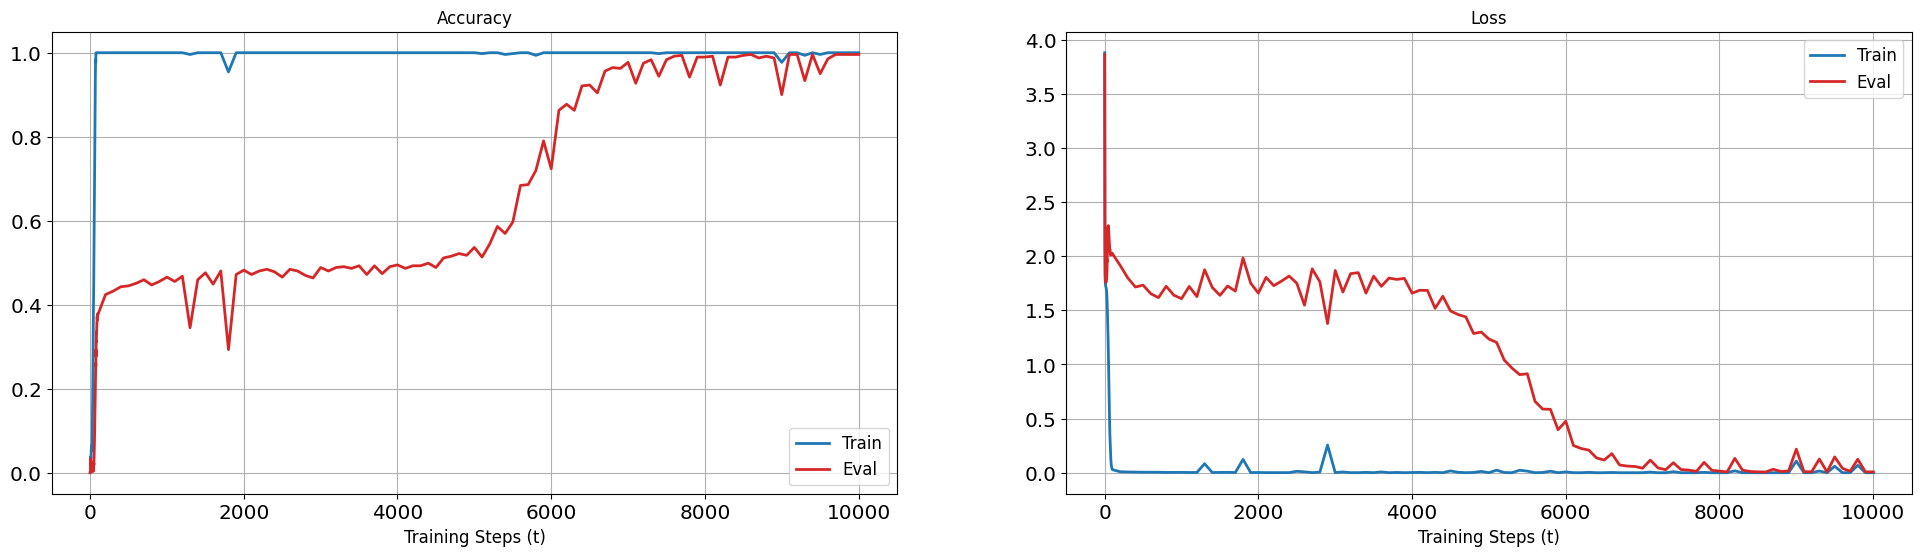

Training ternary operations model...
p : 31
operator : +
r_train : 0.5
train_batch_size : 512
eval_batch_size : 4096
num_workers : 0
model : gpt
num_heads : 4
num_layers : 2
embedding_size : 128
hidden_size : 128
dropout : 0.0
share_embeddings : False
bias_classifier : True
optimizer : adamw
lr : 0.001
weight_decay : 1.0
n_steps : 10001
eval_first : 100
eval_period : 100
print_step : 100
save_model_step : 1000
save_statistic_step : 1000
device : cuda
log_dir : ../logs
verbose : True
exp_name : ternary_operations
operation_orders : 3
Model : GPT(
  (embedding): GPTEmbedding(
    (tokens): Embedding(36, 128, padding_idx=35)
  )
  (decoder): Decoder(
    (blocks): ModuleList(
      (0-1): 2 x Block(
        (self_attn): MultiHeadedAttention(
          (W_Q): Linear(in_features=128, out_features=128, bias=True)
          (W_K): Linear(in_features=128, out_features=128, bias=True)
          (W_V): Linear(in_features=128, out_features=128, bias=True)
          (W_O): Linear(in_features=128, 

Training:   0%|          | 0/334 [00:00<?, ?it/s]


Train loss : 2.830180 | Train accuracy : 0.000000 | Test loss : 2.830032 | Test accuracy : 0.000000 | lr = 0.001


Training:   1%|          | 3/334 [03:31<6:28:33, 70.43s/it]


Train loss : 1.723799 | Train accuracy : 0.032760 | Test loss : 1.726173 | Test accuracy : 0.031957 | lr = 0.001


Training:   2%|▏         | 6/334 [03:58<2:05:34, 22.97s/it]


Train loss : 1.720707 | Train accuracy : 0.031821 | Test loss : 1.724363 | Test accuracy : 0.032696 | lr = 0.001


Training:   3%|▎         | 10/334 [04:10<38:59,  7.22s/it]


Train loss : 1.701992 | Train accuracy : 0.046388 | Test loss : 1.716711 | Test accuracy : 0.035381 | lr = 0.001


Training:   4%|▍         | 13/334 [04:14<18:32,  3.46s/it]


Train loss : 1.257056 | Train accuracy : 0.165212 | Test loss : 1.273217 | Test accuracy : 0.146895 | lr = 0.001


Training:   5%|▍         | 16/334 [04:22<13:58,  2.64s/it]


Train loss : 0.847226 | Train accuracy : 0.325926 | Test loss : 0.860049 | Test accuracy : 0.301041 | lr = 0.001


Training:   6%|▌         | 20/334 [04:33<14:59,  2.86s/it]


Train loss : 0.592297 | Train accuracy : 0.667427 | Test loss : 0.601812 | Test accuracy : 0.628265 | lr = 0.001


Training:   7%|▋         | 23/334 [04:38<10:21,  2.00s/it]


Train loss : 0.582578 | Train accuracy : 0.532425 | Test loss : 0.592832 | Test accuracy : 0.504599 | lr = 0.001


Training:   8%|▊         | 26/334 [04:45<11:08,  2.17s/it]


Train loss : 0.536652 | Train accuracy : 0.663131 | Test loss : 0.544508 | Test accuracy : 0.636992 | lr = 0.001


Training:   9%|▉         | 30/334 [04:57<14:29,  2.86s/it]


Train loss : 0.559449 | Train accuracy : 0.605800 | Test loss : 0.568180 | Test accuracy : 0.582007 | lr = 0.001


Training:  10%|▉         | 33/334 [05:02<10:12,  2.03s/it]


Train loss : 0.628087 | Train accuracy : 0.466300 | Test loss : 0.637517 | Test accuracy : 0.445720 | lr = 0.001


Training:  11%|█         | 36/334 [05:10<11:28,  2.31s/it]


Train loss : 0.516330 | Train accuracy : 0.736171 | Test loss : 0.522775 | Test accuracy : 0.718966 | lr = 0.001


Training:  12%|█▏        | 40/334 [05:21<13:37,  2.78s/it]


Train loss : 0.605152 | Train accuracy : 0.529270 | Test loss : 0.609975 | Test accuracy : 0.517153 | lr = 0.001


Training:  13%|█▎        | 43/334 [05:26<09:43,  2.01s/it]


Train loss : 0.642815 | Train accuracy : 0.410580 | Test loss : 0.648348 | Test accuracy : 0.397583 | lr = 0.001


Training:  14%|█▍        | 46/334 [05:33<10:19,  2.15s/it]


Train loss : 0.505318 | Train accuracy : 0.735097 | Test loss : 0.509310 | Test accuracy : 0.727761 | lr = 0.001


Training:  15%|█▍        | 50/334 [05:44<12:15,  2.59s/it]


Train loss : 0.584602 | Train accuracy : 0.520341 | Test loss : 0.591982 | Test accuracy : 0.507754 | lr = 0.001


Training:  16%|█▌        | 53/334 [05:49<09:40,  2.07s/it]


Train loss : 0.548296 | Train accuracy : 0.563910 | Test loss : 0.548124 | Test accuracy : 0.565358 | lr = 0.001


Training:  17%|█▋        | 56/334 [05:56<09:33,  2.06s/it]


Train loss : 0.534585 | Train accuracy : 0.615333 | Test loss : 0.542179 | Test accuracy : 0.599866 | lr = 0.001


Training:  18%|█▊        | 60/334 [06:07<11:52,  2.60s/it]


Train loss : 0.532914 | Train accuracy : 0.570287 | Test loss : 0.535928 | Test accuracy : 0.561531 | lr = 0.001


Training:  19%|█▉        | 63/334 [06:13<09:29,  2.10s/it]


Train loss : 0.628475 | Train accuracy : 0.397624 | Test loss : 0.632925 | Test accuracy : 0.394830 | lr = 0.001


Training:  20%|█▉        | 66/334 [06:20<09:22,  2.10s/it]


Train loss : 0.527812 | Train accuracy : 0.561224 | Test loss : 0.531552 | Test accuracy : 0.552199 | lr = 0.001


Training:  21%|██        | 70/334 [06:31<11:49,  2.69s/it]


Train loss : 0.817017 | Train accuracy : 0.391380 | Test loss : 0.826348 | Test accuracy : 0.388251 | lr = 0.001


Training:  22%|██▏       | 73/334 [06:36<08:31,  1.96s/it]


Train loss : 0.576772 | Train accuracy : 0.533029 | Test loss : 0.584404 | Test accuracy : 0.513998 | lr = 0.001


Training:  23%|██▎       | 76/334 [06:44<09:11,  2.14s/it]


Train loss : 0.572555 | Train accuracy : 0.542092 | Test loss : 0.575680 | Test accuracy : 0.537697 | lr = 0.001


Training:  24%|██▍       | 80/334 [06:55<11:40,  2.76s/it]


Train loss : 0.544751 | Train accuracy : 0.582103 | Test loss : 0.543953 | Test accuracy : 0.582813 | lr = 0.001


Training:  25%|██▍       | 83/334 [07:00<08:05,  1.94s/it]


Train loss : 0.497515 | Train accuracy : 0.642589 | Test loss : 0.500953 | Test accuracy : 0.632830 | lr = 0.001


Training:  26%|██▌       | 86/334 [07:08<09:06,  2.20s/it]


Train loss : 0.485022 | Train accuracy : 0.683673 | Test loss : 0.485210 | Test accuracy : 0.682041 | lr = 0.001


Training:  27%|██▋       | 90/334 [07:20<11:52,  2.92s/it]


Train loss : 0.550235 | Train accuracy : 0.603786 | Test loss : 0.549586 | Test accuracy : 0.599127 | lr = 0.001


Training:  28%|██▊       | 93/334 [07:24<08:02,  2.00s/it]


Train loss : 0.521407 | Train accuracy : 0.611506 | Test loss : 0.522195 | Test accuracy : 0.605102 | lr = 0.001


Training:  29%|██▊       | 96/334 [07:32<08:52,  2.24s/it]


Train loss : 0.539399 | Train accuracy : 0.533566 | Test loss : 0.539807 | Test accuracy : 0.533400 | lr = 0.001


Training:  30%|██▉       | 100/334 [07:43<10:32,  2.70s/it]


Train loss : 0.612480 | Train accuracy : 0.470932 | Test loss : 0.617252 | Test accuracy : 0.457872 | lr = 0.001


Training:  31%|███       | 103/334 [07:48<07:43,  2.00s/it]


Train loss : 0.551685 | Train accuracy : 0.565118 | Test loss : 0.553151 | Test accuracy : 0.561866 | lr = 0.001


Training:  32%|███▏      | 106/334 [07:55<08:19,  2.19s/it]


Train loss : 0.553596 | Train accuracy : 0.522624 | Test loss : 0.557593 | Test accuracy : 0.511782 | lr = 0.001


Training:  33%|███▎      | 110/334 [08:06<09:49,  2.63s/it]


Train loss : 0.585152 | Train accuracy : 0.519737 | Test loss : 0.590727 | Test accuracy : 0.509231 | lr = 0.001


Training:  34%|███▍      | 113/334 [08:12<07:52,  2.14s/it]


Train loss : 0.516667 | Train accuracy : 0.597476 | Test loss : 0.517683 | Test accuracy : 0.596307 | lr = 0.001


Training:  35%|███▍      | 116/334 [08:19<07:34,  2.09s/it]


Train loss : 0.528104 | Train accuracy : 0.569817 | Test loss : 0.527796 | Test accuracy : 0.573414 | lr = 0.001


Training:  36%|███▌      | 120/334 [08:30<09:15,  2.60s/it]


Train loss : 0.505016 | Train accuracy : 0.576329 | Test loss : 0.503408 | Test accuracy : 0.581739 | lr = 0.001


Training:  37%|███▋      | 123/334 [08:36<07:37,  2.17s/it]


Train loss : 0.608796 | Train accuracy : 0.483754 | Test loss : 0.614426 | Test accuracy : 0.473515 | lr = 0.001


Training:  38%|███▊      | 126/334 [08:43<07:24,  2.14s/it]


Train loss : 0.550270 | Train accuracy : 0.550483 | Test loss : 0.558155 | Test accuracy : 0.538839 | lr = 0.001


Training:  39%|███▉      | 130/334 [08:55<09:15,  2.72s/it]


Train loss : 0.659705 | Train accuracy : 0.412325 | Test loss : 0.663054 | Test accuracy : 0.408862 | lr = 0.001


Training:  40%|███▉      | 133/334 [09:00<07:00,  2.09s/it]


Train loss : 0.550660 | Train accuracy : 0.571630 | Test loss : 0.556465 | Test accuracy : 0.564552 | lr = 0.001


Training:  41%|████      | 136/334 [09:08<07:18,  2.22s/it]


Train loss : 0.529078 | Train accuracy : 0.576128 | Test loss : 0.532523 | Test accuracy : 0.569990 | lr = 0.001


Training:  42%|████▏     | 140/334 [09:19<08:52,  2.75s/it]


Train loss : 0.484991 | Train accuracy : 0.670918 | Test loss : 0.489188 | Test accuracy : 0.659282 | lr = 0.001


Training:  43%|████▎     | 143/334 [09:24<06:18,  1.98s/it]


Train loss : 0.521917 | Train accuracy : 0.586802 | Test loss : 0.527010 | Test accuracy : 0.577308 | lr = 0.001


Training:  44%|████▎     | 146/334 [09:32<06:55,  2.21s/it]


Train loss : 0.684914 | Train accuracy : 0.425685 | Test loss : 0.684672 | Test accuracy : 0.417925 | lr = 0.001


Training:  45%|████▍     | 150/334 [09:43<08:32,  2.79s/it]


Train loss : 0.602467 | Train accuracy : 0.604525 | Test loss : 0.606077 | Test accuracy : 0.595770 | lr = 0.001


Training:  46%|████▌     | 153/334 [09:48<05:58,  1.98s/it]


Train loss : 0.564685 | Train accuracy : 0.501477 | Test loss : 0.564983 | Test accuracy : 0.499027 | lr = 0.001


Training:  47%|████▋     | 156/334 [09:56<06:32,  2.21s/it]


Train loss : 0.458590 | Train accuracy : 0.730330 | Test loss : 0.460577 | Test accuracy : 0.723330 | lr = 0.001


Training:  48%|████▊     | 160/334 [10:07<08:09,  2.82s/it]


Train loss : 0.591787 | Train accuracy : 0.539474 | Test loss : 0.593932 | Test accuracy : 0.531588 | lr = 0.001


Training:  49%|████▉     | 163/334 [10:12<05:43,  2.01s/it]


Train loss : 0.624427 | Train accuracy : 0.409976 | Test loss : 0.628305 | Test accuracy : 0.404162 | lr = 0.001


Training:  50%|████▉     | 166/334 [10:19<06:23,  2.28s/it]


Train loss : 0.609288 | Train accuracy : 0.559815 | Test loss : 0.613218 | Test accuracy : 0.554817 | lr = 0.001


Training:  51%|█████     | 170/334 [10:30<07:20,  2.69s/it]


Train loss : 0.507211 | Train accuracy : 0.666488 | Test loss : 0.509669 | Test accuracy : 0.658745 | lr = 0.001


Training:  52%|█████▏    | 173/334 [10:36<05:28,  2.04s/it]


Train loss : 0.605089 | Train accuracy : 0.460795 | Test loss : 0.606220 | Test accuracy : 0.461363 | lr = 0.001


Training:  53%|█████▎    | 176/334 [10:43<05:41,  2.16s/it]


Train loss : 0.618555 | Train accuracy : 0.515038 | Test loss : 0.622976 | Test accuracy : 0.517892 | lr = 0.001


Training:  54%|█████▍    | 180/334 [10:54<06:42,  2.62s/it]


Train loss : 0.641466 | Train accuracy : 0.401450 | Test loss : 0.640571 | Test accuracy : 0.405639 | lr = 0.001


Training:  55%|█████▍    | 183/334 [10:59<05:16,  2.10s/it]


Train loss : 0.593515 | Train accuracy : 0.592172 | Test loss : 0.595667 | Test accuracy : 0.582276 | lr = 0.001


Training:  56%|█████▌    | 186/334 [11:06<05:09,  2.09s/it]


Train loss : 0.574641 | Train accuracy : 0.501276 | Test loss : 0.575376 | Test accuracy : 0.500906 | lr = 0.001


Training:  57%|█████▋    | 190/334 [11:18<06:21,  2.65s/it]


Train loss : 0.661160 | Train accuracy : 0.433808 | Test loss : 0.667746 | Test accuracy : 0.424102 | lr = 0.001


Training:  58%|█████▊    | 193/334 [11:23<05:07,  2.18s/it]


Train loss : 0.623095 | Train accuracy : 0.525510 | Test loss : 0.629609 | Test accuracy : 0.518160 | lr = 0.001


Training:  59%|█████▊    | 196/334 [11:30<04:52,  2.12s/it]


Train loss : 0.553391 | Train accuracy : 0.583110 | Test loss : 0.553462 | Test accuracy : 0.584693 | lr = 0.001


Training:  60%|█████▉    | 200/334 [11:42<05:59,  2.69s/it]


Train loss : 0.575832 | Train accuracy : 0.578410 | Test loss : 0.578826 | Test accuracy : 0.570728 | lr = 0.001


Training:  61%|██████    | 203/334 [11:47<04:25,  2.03s/it]


Train loss : 0.542551 | Train accuracy : 0.636144 | Test loss : 0.543541 | Test accuracy : 0.635784 | lr = 0.001


Training:  62%|██████▏   | 206/334 [11:54<04:35,  2.15s/it]


Train loss : 0.626895 | Train accuracy : 0.482546 | Test loss : 0.631627 | Test accuracy : 0.464653 | lr = 0.001


Training:  63%|██████▎   | 210/334 [12:05<05:32,  2.68s/it]


Train loss : 0.565032 | Train accuracy : 0.691058 | Test loss : 0.566769 | Test accuracy : 0.691104 | lr = 0.001


Training:  64%|██████▍   | 213/334 [12:10<04:00,  1.99s/it]


Train loss : 0.752279 | Train accuracy : 0.383660 | Test loss : 0.754841 | Test accuracy : 0.377174 | lr = 0.001


Training:  65%|██████▍   | 216/334 [12:18<04:20,  2.21s/it]


Train loss : 0.486213 | Train accuracy : 0.665011 | Test loss : 0.490007 | Test accuracy : 0.661363 | lr = 0.001


Training:  66%|██████▌   | 220/334 [12:29<05:15,  2.77s/it]


Train loss : 0.783789 | Train accuracy : 0.326799 | Test loss : 0.792630 | Test accuracy : 0.320913 | lr = 0.001


Training:  67%|██████▋   | 223/334 [12:34<03:37,  1.96s/it]


Train loss : 0.755966 | Train accuracy : 0.339957 | Test loss : 0.761104 | Test accuracy : 0.336220 | lr = 0.001


Training:  68%|██████▊   | 226/334 [12:42<04:00,  2.23s/it]


Train loss : 0.641259 | Train accuracy : 0.473416 | Test loss : 0.644933 | Test accuracy : 0.468345 | lr = 0.001


Training:  69%|██████▉   | 230/334 [12:53<04:45,  2.75s/it]


Train loss : 0.577737 | Train accuracy : 0.480800 | Test loss : 0.577483 | Test accuracy : 0.483115 | lr = 0.001


Training:  70%|██████▉   | 233/334 [12:58<03:27,  2.05s/it]


Train loss : 0.556284 | Train accuracy : 0.526786 | Test loss : 0.561163 | Test accuracy : 0.506009 | lr = 0.001


Training:  71%|███████   | 236/334 [13:06<03:48,  2.33s/it]


Train loss : 0.681500 | Train accuracy : 0.543435 | Test loss : 0.682368 | Test accuracy : 0.542262 | lr = 0.001


Training:  72%|███████▏  | 240/334 [13:17<04:13,  2.69s/it]


Train loss : 0.764144 | Train accuracy : 0.316998 | Test loss : 0.771113 | Test accuracy : 0.306277 | lr = 0.001


Training:  73%|███████▎  | 243/334 [13:22<03:08,  2.08s/it]


Train loss : 0.678015 | Train accuracy : 0.420918 | Test loss : 0.682189 | Test accuracy : 0.411883 | lr = 0.001


Training:  74%|███████▎  | 246/334 [13:29<03:02,  2.08s/it]


Train loss : 0.517461 | Train accuracy : 0.665682 | Test loss : 0.516972 | Test accuracy : 0.666667 | lr = 0.001


Training:  75%|███████▍  | 250/334 [13:41<03:43,  2.66s/it]


Train loss : 0.566277 | Train accuracy : 0.540816 | Test loss : 0.569356 | Test accuracy : 0.537496 | lr = 0.001


Training:  76%|███████▌  | 253/334 [13:46<02:55,  2.17s/it]


Train loss : 0.615859 | Train accuracy : 0.492347 | Test loss : 0.616714 | Test accuracy : 0.487546 | lr = 0.001


Training:  77%|███████▋  | 256/334 [13:53<02:45,  2.12s/it]


Train loss : 0.585272 | Train accuracy : 0.527591 | Test loss : 0.591053 | Test accuracy : 0.516146 | lr = 0.001


Training:  78%|███████▊  | 260/334 [14:04<03:14,  2.63s/it]


Train loss : 0.633992 | Train accuracy : 0.453679 | Test loss : 0.641252 | Test accuracy : 0.444646 | lr = 0.001


Training:  79%|███████▊  | 263/334 [14:10<02:27,  2.07s/it]


Train loss : 0.713490 | Train accuracy : 0.406351 | Test loss : 0.716963 | Test accuracy : 0.400336 | lr = 0.001


Training:  80%|███████▉  | 266/334 [14:17<02:22,  2.09s/it]


Train loss : 0.541876 | Train accuracy : 0.633459 | Test loss : 0.543532 | Test accuracy : 0.631420 | lr = 0.001


Training:  81%|████████  | 270/334 [14:28<02:54,  2.72s/it]


Train loss : 0.580345 | Train accuracy : 0.541219 | Test loss : 0.581202 | Test accuracy : 0.545015 | lr = 0.001


Training:  82%|████████▏ | 273/334 [14:33<02:00,  1.97s/it]


Train loss : 0.568279 | Train accuracy : 0.557734 | Test loss : 0.568442 | Test accuracy : 0.560457 | lr = 0.001


Training:  83%|████████▎ | 276/334 [14:41<02:03,  2.13s/it]


Train loss : 0.465926 | Train accuracy : 0.701598 | Test loss : 0.468342 | Test accuracy : 0.691037 | lr = 0.001


Training:  84%|████████▍ | 280/334 [14:52<02:29,  2.77s/it]


Train loss : 0.521273 | Train accuracy : 0.600430 | Test loss : 0.520681 | Test accuracy : 0.606915 | lr = 0.001


Training:  85%|████████▍ | 283/334 [14:57<01:40,  1.97s/it]


Train loss : 0.558822 | Train accuracy : 0.565051 | Test loss : 0.559402 | Test accuracy : 0.556160 | lr = 0.001


Training:  86%|████████▌ | 286/334 [15:04<01:43,  2.15s/it]


Train loss : 0.704182 | Train accuracy : 0.413534 | Test loss : 0.709595 | Test accuracy : 0.403760 | lr = 0.001


Training:  87%|████████▋ | 290/334 [15:15<02:01,  2.75s/it]


Train loss : 0.600954 | Train accuracy : 0.464689 | Test loss : 0.603346 | Test accuracy : 0.460423 | lr = 0.001


Training:  88%|████████▊ | 293/334 [15:20<01:21,  1.99s/it]


Train loss : 0.469212 | Train accuracy : 0.701866 | Test loss : 0.470919 | Test accuracy : 0.693656 | lr = 0.001


Training:  89%|████████▊ | 296/334 [15:27<01:19,  2.09s/it]


Train loss : 0.676056 | Train accuracy : 0.425483 | Test loss : 0.677437 | Test accuracy : 0.425378 | lr = 0.001


Training:  90%|████████▉ | 300/334 [15:38<01:27,  2.58s/it]


Train loss : 0.635133 | Train accuracy : 0.444079 | Test loss : 0.638136 | Test accuracy : 0.440551 | lr = 0.001


Training:  91%|█████████ | 303/334 [15:43<01:04,  2.07s/it]


Train loss : 0.691249 | Train accuracy : 0.423201 | Test loss : 0.695685 | Test accuracy : 0.412085 | lr = 0.001


Training:  92%|█████████▏| 306/334 [15:50<00:56,  2.01s/it]


Train loss : 0.545758 | Train accuracy : 0.566461 | Test loss : 0.547357 | Test accuracy : 0.568983 | lr = 0.001


Training:  93%|█████████▎| 310/334 [16:01<01:01,  2.58s/it]


Train loss : 0.715092 | Train accuracy : 0.396952 | Test loss : 0.717087 | Test accuracy : 0.399933 | lr = 0.001


Training:  94%|█████████▎| 313/334 [16:07<00:44,  2.12s/it]


Train loss : 0.515582 | Train accuracy : 0.645475 | Test loss : 0.518480 | Test accuracy : 0.636119 | lr = 0.001


Training:  95%|█████████▍| 316/334 [16:13<00:36,  2.05s/it]


Train loss : 0.620566 | Train accuracy : 0.462943 | Test loss : 0.621946 | Test accuracy : 0.465660 | lr = 0.001


Training:  96%|█████████▌| 320/334 [16:25<00:36,  2.64s/it]


Train loss : 0.752089 | Train accuracy : 0.345260 | Test loss : 0.753561 | Test accuracy : 0.343471 | lr = 0.001


Training:  97%|█████████▋| 323/334 [16:29<00:20,  1.91s/it]


Train loss : 0.721053 | Train accuracy : 0.364796 | Test loss : 0.718881 | Test accuracy : 0.365223 | lr = 0.001


Training:  98%|█████████▊| 326/334 [16:37<00:16,  2.09s/it]


Train loss : 0.500259 | Train accuracy : 0.810956 | Test loss : 0.504530 | Test accuracy : 0.799799 | lr = 0.001


Training:  99%|█████████▉| 330/334 [16:48<00:11,  2.78s/it]


Train loss : 0.728946 | Train accuracy : 0.365199 | Test loss : 0.725509 | Test accuracy : 0.361396 | lr = 0.001


Training: 100%|█████████▉| 333/334 [16:53<00:01,  1.99s/it]


Train loss : 0.590168 | Train accuracy : 0.486574 | Test loss : 0.594793 | Test accuracy : 0.484122 | lr = 0.001


Training: 100%|██████████| 334/334 [16:59<00:00,  3.05s/it]


Train loss : 0.527903 | Train accuracy : 0.637822 | Test loss : 0.533375 | Test accuracy : 0.626922 | lr = 0.001


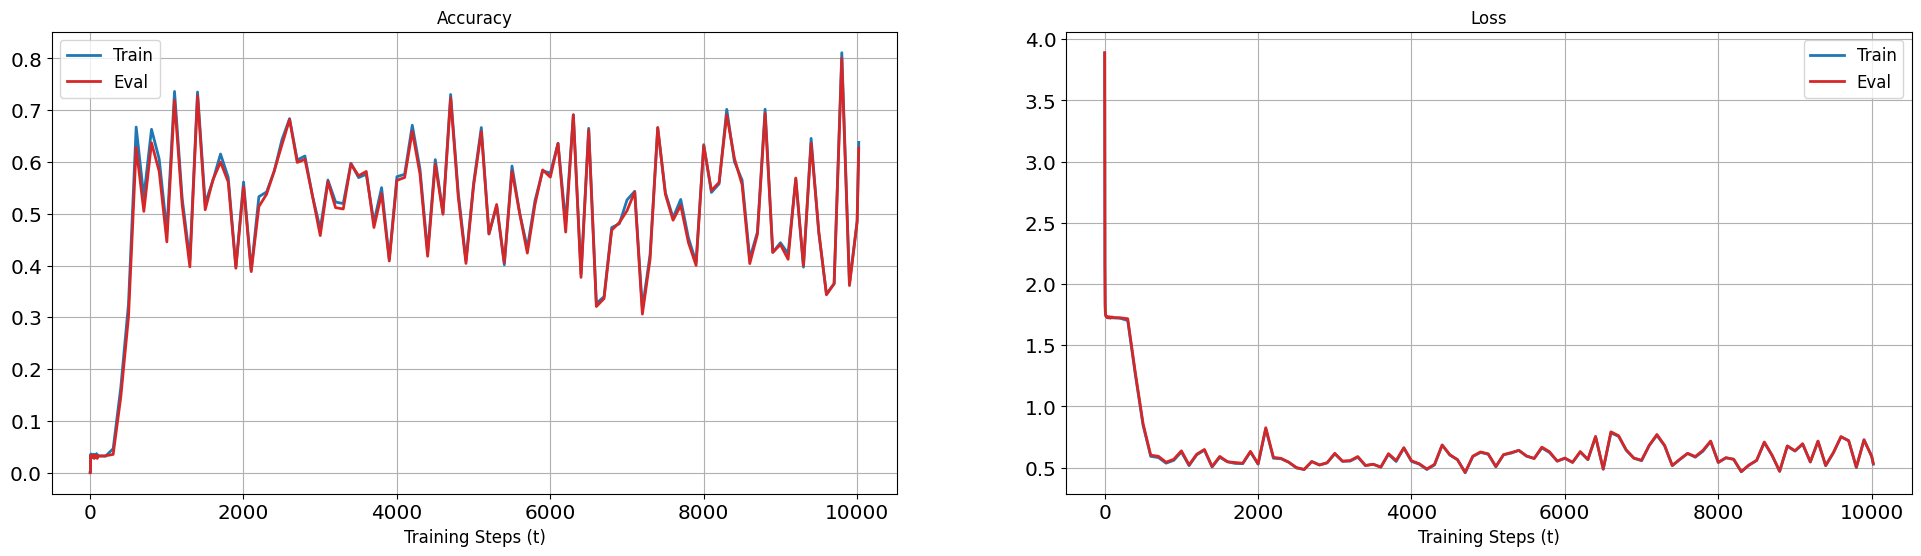

In [10]:
import torch
from train import Arguments, train, train_m_models
from plotter import plot_loss_accs

# Create separate argument objects for binary and ternary operations
args_binary = Arguments()
args_ternary = Arguments()

# Common settings for both
common_settings = {
    # Data
    'p': 31,
    'operator': "+",
    'r_train': .5,
    'train_batch_size': 512,
    'eval_batch_size': 2**12,
    'num_workers': 0,
    # Model
    'model': 'gpt',
    'num_heads': 4,
    'num_layers': 2,
    'embedding_size': 2**7,
    'hidden_size': 2**7,
    'dropout': 0.0,
    'share_embeddings': False,
    'bias_classifier': True,
    # Optimization
    'optimizer': 'adamw',
    'lr': 1e-3,
    'weight_decay': 1e-0,
    # Training
    'n_steps': 10**4 + 1,
    'eval_first': 10**2,
    'eval_period': 10**2,
    'print_step': 10**2,
    'save_model_step': 10**3,
    'save_statistic_step': 10**3,
    # Experiment
    'device': "cuda" if torch.cuda.is_available() else "cpu",
    'log_dir': '../logs',
    'verbose': True
}

# Apply common settings
for key, value in common_settings.items():
    setattr(args_binary, key, value)
    setattr(args_ternary, key, value)

# Set operation-specific settings
args_binary.exp_name = "binary_operations"
args_binary.operation_orders = 2  # Binary operations

args_ternary.exp_name = "ternary_operations"
args_ternary.operation_orders = 3  # Ternary operations

# Train and plot for binary operations
print("Training binary operations model...")
binary_metrics, _ = train(args_binary)
plot_loss_accs(binary_metrics, multiple_runs=False, log_x=False, log_y=False,
               fileName=args_binary.exp_name, filePath=None, show=True)

# Train and plot for ternary operations
print("Training ternary operations model...")
ternary_metrics, _ = train(args_ternary)
plot_loss_accs(ternary_metrics, multiple_runs=False, log_x=False, log_y=False,
               fileName=args_ternary.exp_name, filePath=None, show=True)

# Optional: Train multiple models for each case
if False:  # Set to True if you want to run multiple trials
    print("Training multiple binary operations models...")
    _, all_binary_metrics, _ = train_m_models(args_binary, M=2, seeds=[0, 42])
    plot_loss_accs(all_binary_metrics, multiple_runs=True, log_x=False, log_y=False,
                   fileName=args_binary.exp_name+"_multi", filePath=None, show=True)

    print("Training multiple ternary operations models...")
    _, all_ternary_metrics, _ = train_m_models(args_ternary, M=2, seeds=[0, 42])
    plot_loss_accs(all_ternary_metrics, multiple_runs=True, log_x=False, log_y=False,
                   fileName=args_ternary.exp_name+"_multi", filePath=None, show=True)